In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style = 'white', font_scale = 1)
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
import nltk
nltk.download('wordnet')
# Initialize VADER for sentiment analysis
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
#from nrclex import NRCLex  # Ensure the nrclex library is installed
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast  # For converting string representation of dictionary back to dictionary
import re # Used for regular expression

from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from tabulate import tabulate

import joblib
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dissertation/ukhpi-comparison-all-hpi-bradford-from-2013-01-01-to-2029-01-01.csv')

In [ ]:
df.head(5)

,Name,URI,Region GSS code,Period,Sales volume,Reporting period,House price index All property types,Pivotable date
0,Bradford,http://landregistry.data.gov.uk/id/region/brad...,E08000032,2013-01,301.0,monthly,93.48,01-01-13
1,Calderdale,http://landregistry.data.gov.uk/id/region/cald...,E08000033,2013-01,141.0,monthly,92.30,01-01-13
2,Leeds,http://landregistry.data.gov.uk/id/region/leeds,E08000035,2013-01,525.0,monthly,91.71,01-01-13
3,West Yorkshire,http://landregistry.data.gov.uk/id/region/west...,E11000006,2013-01,1387.0,monthly,92.92,01-01-13
4,Bradford,http://landregistry.data.gov.uk/id/region/brad...,E08000032,2013-02,353.0,monthly,93.05,01-02-13


In [ ]:
df.tail(5)

,Name,URI,Region GSS code,Period,Sales volume,Reporting period,House price index All property types,Pivotable date
519,West Yorkshire,http://landregistry.data.gov.uk/id/region/west...,E11000006,2023-10,NaN,monthly,154.7,01-10-23
520,Bradford,http://landregistry.data.gov.uk/id/region/brad...,E08000032,2023-11,NaN,monthly,150.0,01-11-23
521,Calderdale,http://landregistry.data.gov.uk/id/region/cald...,E08000033,2023-11,NaN,monthly,147.5,01-11-23
522,Leeds,http://landregistry.data.gov.uk/id/region/leeds,E08000035,2023-11,NaN,monthly,161.8,01-11-23
523,West Yorkshire,http://landregistry.data.gov.uk/id/region/west...,E11000006,2023-11,NaN,monthly,155.5,01-11-23


In [ ]:
df.shape

(524, 8)

In [ ]:
print('No. of rows =', df.shape[0])
print('No. of columns =', df.shape[1])

No. of rows = 524
No. of columns = 8


In [ ]:
# check dataset meta data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Name                                  524 non-null    object 
 1   URI                                   524 non-null    object 
 2   Region GSS code                       524 non-null    object 
 3   Period                                524 non-null    object 
 4   Sales volume                          516 non-null    float64
 5   Reporting period                      524 non-null    object 
 6   House price index All property types  524 non-null    float64
 7   Pivotable date                        524 non-null    object 
dtypes: float64(2), object(6)
memory usage: 32.9+ KB


# Display statistics of the dataset

In [ ]:
df.describe()


,Sales volume,House price index All property types
count,516.000000,524.000000
mean,1129.544574,118.501889
std,999.376633,18.426182
min,97.000000,88.860000
25%,352.250000,104.427500
50%,702.500000,115.035000
75%,1528.750000,132.380000
max,4664.000000,165.100000


In [ ]:
# Drop URI column
df_clean = df.drop(columns = ['URI'])

In [ ]:
#df_clean_filled = df_clean.fillna(df_clean.mean())
df_clean.isnull()


,Name,Region GSS code,Period,Sales volume,Reporting period,House price index All property types,Pivotable date
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
519,False,False,False,True,False,False,False
520,False,False,False,True,False,False,False
521,False,False,False,True,False,False,False
522,False,False,False,True,False,False,False


In [ ]:
# Check NULL again
#null = round(100 *(df_clean.isna().sum()/df_clean.shape[0]).sort_values(ascending = False) ,2)
#null.to_frame(name = 'percent NULL data (%)')
df_clean.isnull().sum()

,0
Name,0
Region GSS code,0
Period,0
Sales volume,8
Reporting period,0
House price index All property types,0
Pivotable date,0


In [ ]:
df_clean.duplicated().any()

False

In [ ]:
df_clean.dropna(axis = 0, inplace = True)
# Check NULL again
#null = round(100 *(df_clean.isna().sum()/df_clean.shape[0]).sort_values(ascending = False) ,2)
#null.to_frame(name = 'percent NULL data (%)')
df_clean.isnull().sum()

,0
Name,0
Region GSS code,0
Period,0
Sales volume,0
Reporting period,0
House price index All property types,0
Pivotable date,0


In [ ]:
# What are Name boroughs ?
boroughs = df_clean['Name'].unique()
print(boroughs)


['Bradford' 'Calderdale' 'Leeds' 'West Yorkshire']


# Separating input features and output labels

In [ ]:
# column 'sale Volume' is input feature
# column 'House price index' is its corresponding label

In [ ]:
X = df_clean['House price index All property types']
y = df_clean['Sales volume']

# Display top 5 rows of input

In [ ]:
X.head()

,House price index All property types
0,93.48
1,92.30
2,91.71
3,92.92
4,93.05


In [ ]:

print(X)

0       93.48
1       92.30
2       91.71
3       92.92
4       93.05
        ...  
511    154.40
512    146.20
513    147.00
514    165.10
515    155.20
Name: House price index All property types, Length: 516, dtype: float64


# Check whether the data is balanced or not

In [ ]:
df_clean['Sales volume'].value_counts()

,count
Sales volume,
683.0,3
1078.0,3
280.0,3
279.0,3
327.0,3
...,...
3186.0,1
1189.0,1
631.0,1


# Balancing imbalanced data using oversampling

In [ ]:
# balancing imbalanced data using SMOTE


In [ ]:
# Import necessary libraries
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Example DataFrame (df_clean) - replace this with your actual DataFrame
# df_clean = pd.read_csv('your_data.csv')

# Display the original class distribution
print(f"Original 'Sales volume' distribution:\n{df_clean['Sales volume'].value_counts()}")

# Separate features and target
X = df_clean.drop(columns=['Sales volume'])
y = df_clean['Sales volume']

# Create the RandomOverSampler object
ros = RandomOverSampler(random_state=42)

# Fit and resample the data
X_resample, y_resample = ros.fit_resample(X, y)

# Convert to DataFrame for easier handling
X_resample_df = pd.DataFrame(X_resample, columns=X.columns)
y_resample_df = pd.DataFrame(y_resample, columns=['Sales volume'])

# Combine resampled features and target
df_resampled = pd.concat([X_resample_df, y_resample_df], axis=1)

# Display the resampled class distribution
print(f"Resampled 'Sales volume' distribution:\n{df_resampled['Sales volume'].value_counts()}")

# Display the first few rows of the resampled DataFrame
print(df_resampled.head())


Original 'Sales volume' distribution:
Sales volume
683.0     3
1078.0    3
280.0     3
279.0     3
327.0     3
         ..
3186.0    1
1189.0    1
631.0     1
2983.0    1
1636.0    1
Name: count, Length: 442, dtype: int64
Resampled 'Sales volume' distribution:
Sales volume
301.0     3
712.0     3
454.0     3
2516.0    3
916.0     3
         ..
2217.0    3
828.0     3
201.0     3
474.0     3
1636.0    3
Name: count, Length: 442, dtype: int64
             Name Region GSS code   Period Reporting period  \
0        Bradford       E08000032  2013-01          monthly   
1      Calderdale       E08000033  2013-01          monthly   
2           Leeds       E08000035  2013-01          monthly   
3  West Yorkshire       E11000006  2013-01          monthly   
4        Bradford       E08000032  2013-02          monthly   

   House price index All property types Pivotable date  Sales volume  
0                                 93.48       01-01-13         301.0  
1                                 

In [ ]:

# Create a box plot for 'Sales volume'
fig = px.box(df_clean, y='Sales volume', title='Box Plot of Sales Volume')
# Show the plot
fig.show()
#po
#sd


array([[<Axes: title={'center': 'Sales volume'}>,
        <Axes: title={'center': 'House price index All property types'}>]],
      dtype=object)

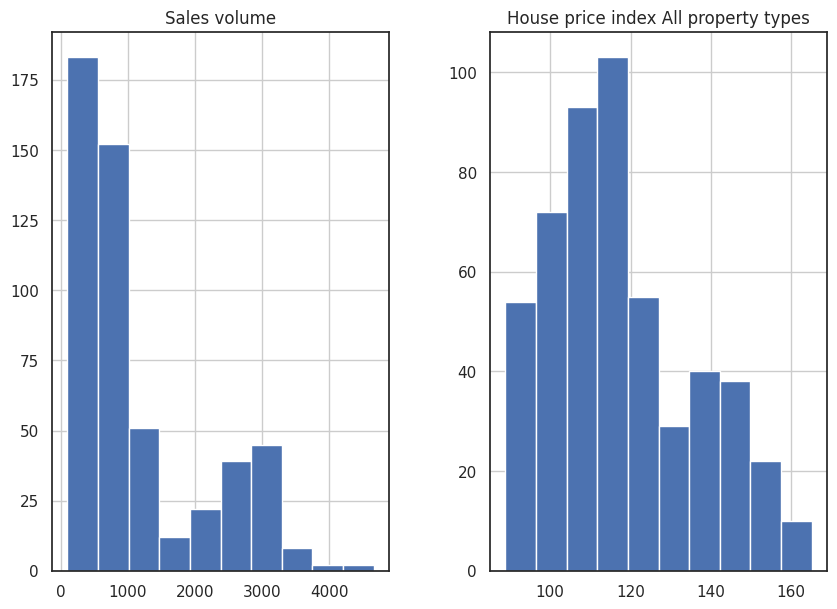

In [ ]:
df_clean.hist(figsize = (10, 7))

In [ ]:

# Create a histogram for all boroughs
fig = px.histogram(df_clean, x='House price index All property types',
                   color_discrete_sequence=['blue'], # Change color here
                   title='Histogram of House Price Index for All Boroughs')

# Show the plot
fig.show()


In [ ]:
# Create a line plot for 'Period' and 'Sales volume'
fig = px.line(df_clean, x='Period', y='Sales volume',
              title='Sales Volume Over Time')

# Show the plot
fig.show()

In [ ]:
# Calculate mean house price index for each borough
mean_house_price_index = df_clean.groupby('Name')['House price index All property types'].mean().reset_index()

# Print the result
print(mean_house_price_index)


             Name  House price index All property types
0        Bradford                            115.802403
1      Calderdale                            115.677752
2           Leeds                            121.794031
3  West Yorkshire                            118.606357


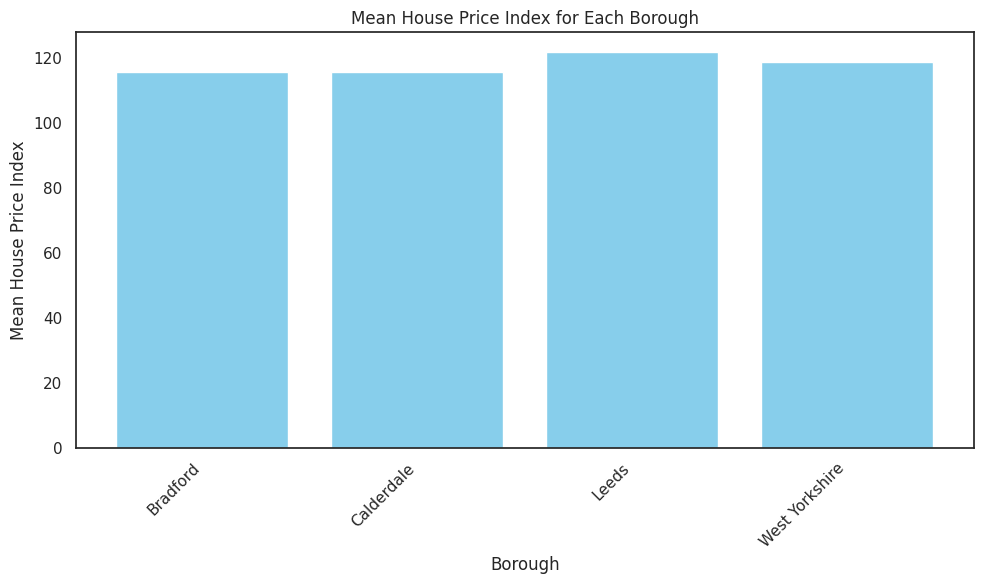

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(mean_house_price_index['Name'], mean_house_price_index['House price index All property types'], color='skyblue')
plt.title('Mean House Price Index for Each Borough')
plt.xlabel('Borough')
plt.ylabel('Mean House Price Index')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

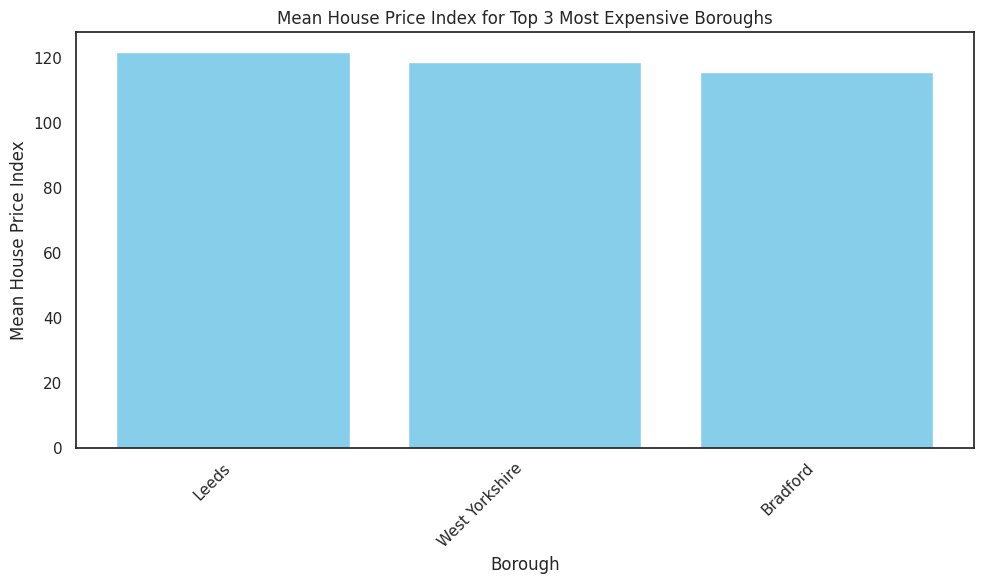

In [ ]:
# Calculate mean house price index for each borough
mean_house_price_index = df_clean.groupby('Name')['House price index All property types'].mean().reset_index()

# Sort the DataFrame by mean house price index in descending order
mean_house_price_index_sorted = mean_house_price_index.sort_values(by='House price index All property types', ascending=False)

# Select the top 3 most expensive boroughs
top_3_expensive = mean_house_price_index_sorted.head(3)

# Plot bar chart for top 3 most expensive boroughs
plt.figure(figsize=(10, 6))
plt.bar(top_3_expensive['Name'], top_3_expensive['House price index All property types'], color='skyblue')
plt.title('Mean House Price Index for Top 3 Most Expensive Boroughs')
plt.xlabel('Borough')
plt.ylabel('Mean House Price Index')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
# Setting the style for the plots
sns.set(style="whitegrid")

# Assuming df is your DataFrame and 'Period' and 'Pivotal Date' are in datetime format
df['Period'] = pd.to_datetime(df['Period'])
df['Pivotable date'] = pd.to_datetime(df['Pivotable date'])

# Datetime features
df['Year'] = df['Period'].dt.year
df['Month'] = df['Period'].dt.month
df['Quarter'] = df['Period'].dt.quarter
df['DayOfWeek'] = df['Period'].dt.dayofweek

df[['Period', 'Year', 'Month', 'Quarter', 'DayOfWeek']].head(645)

,Period,Year,Month,Quarter,DayOfWeek
0,2013-01-01,2013,1,1,1
1,2013-01-01,2013,1,1,1
2,2013-01-01,2013,1,1,1
3,2013-01-01,2013,1,1,1
4,2013-02-01,2013,2,1,4
...,...,...,...,...,...
519,2023-10-01,2023,10,4,6
520,2023-11-01,2023,11,4,2
521,2023-11-01,2023,11,4,2
522,2023-11-01,2023,11,4,2


## **Seasonal Features**

Features Created:
* IsHolidaySeason: Binary feature indicating whether the period is during a holiday season (e.g., December).
* IsQuarterStart: Binary feature indicating if the period is the start of a quarter.
* IsQuarterEnd: Binary feature indicating if the period is the end of a quarter.
> Purpose:
These features help to identify specific seasonal impacts on sales and prices that are not captured by basic datetime features.



        Period  IsHolidaySeason  IsQuarterStart  IsQuarterEnd
0   2013-01-01                0               1             0
1   2013-01-01                0               1             0
2   2013-01-01                0               1             0
3   2013-01-01                0               1             0
4   2013-02-01                0               0             0
..         ...              ...             ...           ...
519 2023-10-01                0               1             0
520 2023-11-01                0               0             0
521 2023-11-01                0               0             0
522 2023-11-01                0               0             0
523 2023-11-01                0               0             0

[524 rows x 4 columns]


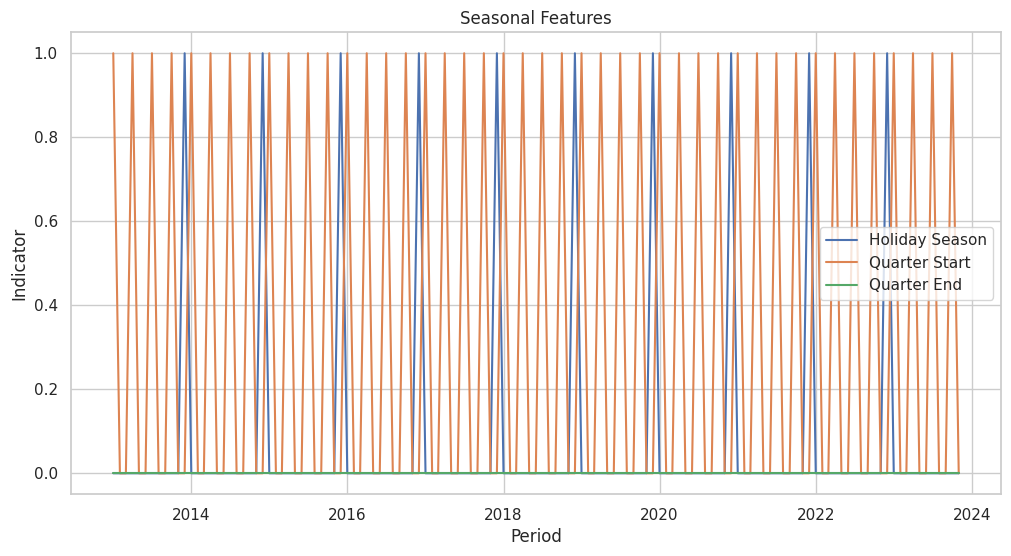

In [ ]:

df['IsHolidaySeason'] = df['Month'].isin([12]).astype(int)

# Add quarter start and end indicators
df['IsQuarterStart'] = df['Period'].dt.is_quarter_start.astype(int)
df['IsQuarterEnd'] = df['Period'].dt.is_quarter_end.astype(int)

print(df[['Period', 'IsHolidaySeason', 'IsQuarterStart', 'IsQuarterEnd']].head(525))
plt.figure(figsize=(12, 6))
plt.plot(df['Period'], df['IsHolidaySeason'], label='Holiday Season')
plt.plot(df['Period'], df['IsQuarterStart'], label='Quarter Start')
plt.plot(df['Period'], df['IsQuarterEnd'], label='Quarter End')
plt.xlabel('Period')
plt.ylabel('Indicator')
plt.title('Seasonal Features')
plt.legend()
plt.show()



# **Growth Rate Features**
Features Created:
SalesVolume_GrowthRate:
* Growth rate of sales volume compared to the previous month.
* HPI_GrowthRate: Growth rate of house price index compared to the previous month.
> Purpose:
Growth rate features help to capture the rate of change and can indicate acceleration or deceleration trends.



        Period  SalesVolume_GrowthRate  HPI_GrowthRate
0   2013-01-01                     NaN             NaN
1   2013-01-01               -0.531561       -0.012623
2   2013-01-01                2.723404       -0.006392
3   2013-01-01                1.641905        0.013194
4   2013-02-01               -0.745494        0.001399
..         ...                     ...             ...
519 2023-10-01                0.000000       -0.053823
520 2023-11-01                0.000000       -0.030381
521 2023-11-01                0.000000       -0.016667
522 2023-11-01                0.000000        0.096949
523 2023-11-01                0.000000       -0.038937

[524 rows x 3 columns]


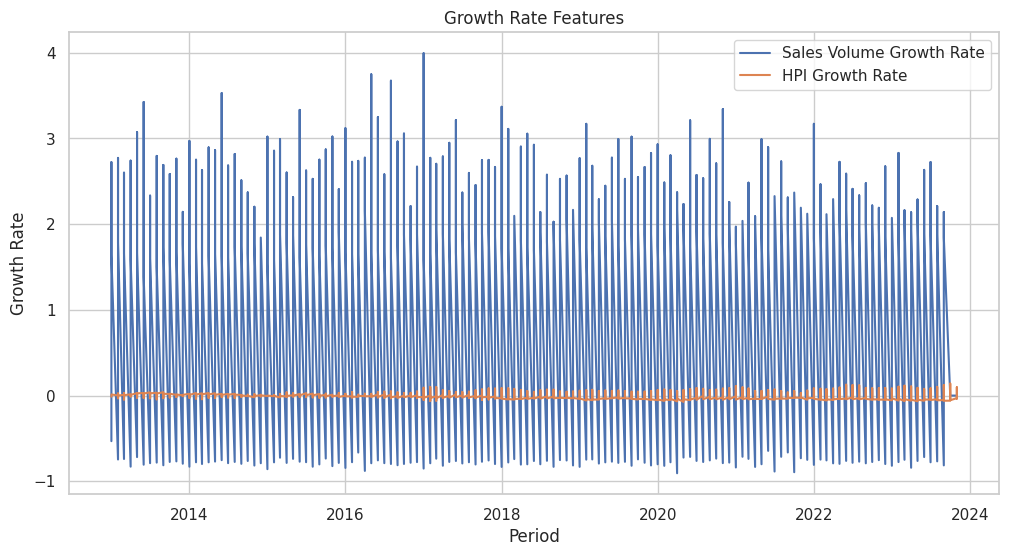

In [ ]:
# Calculate growth rate features
df['SalesVolume_GrowthRate'] = df['Sales volume'].pct_change()
df['HPI_GrowthRate'] = df['House price index All property types'].pct_change()

print(df[['Period', 'SalesVolume_GrowthRate', 'HPI_GrowthRate']].head(525))
plt.figure(figsize=(12, 6))
plt.plot(df['Period'], df['SalesVolume_GrowthRate'], label='Sales Volume Growth Rate')
plt.plot(df['Period'], df['HPI_GrowthRate'], label='HPI Growth Rate')
plt.xlabel('Period')
plt.ylabel('Growth Rate')
plt.title('Growth Rate Features')
plt.legend()
plt.show()



# **Moving Average Convergence Divergence (MACD)**
Features Created:
* MACD: Difference between short-term and long-term moving averages of sales volume.
* MACD_Signal: Signal line, which is the moving average of the MACD.
> Purpose:
MACD is a trend-following momentum indicator that can help identify changes in the strength, direction, momentum, and duration of a trend.



        Period       MACD  MACD_Signal
0   2013-01-01   0.000000     0.000000
1   2013-01-01 -12.763533    -2.552707
2   2013-01-01   8.014480    -0.439269
3   2013-01-01  92.965750    18.241735
4   2013-02-01  75.979244    29.789236
..         ...        ...          ...
519 2023-10-01  21.926495     4.772025
520 2023-11-01  21.926495     8.202919
521 2023-11-01  21.926495    10.947634
522 2023-11-01  21.926495    13.143407
523 2023-11-01  21.926495    14.900024

[524 rows x 3 columns]


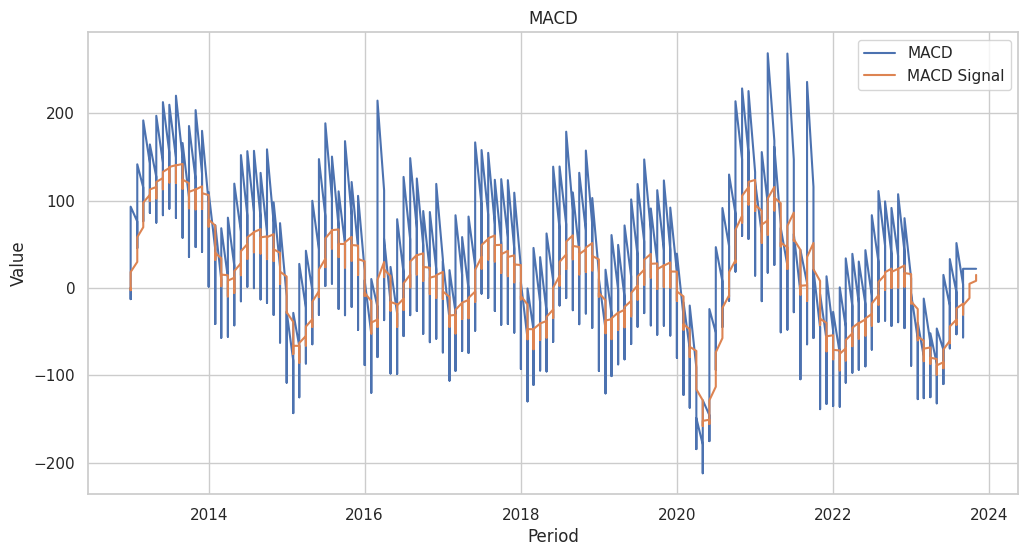

In [ ]:
# Calculate MACD and MACD Signal
short_window = 12
long_window = 26
signal_window = 9

df['MACD'] = df['Sales volume'].ewm(span=short_window, adjust=False).mean() - df['Sales volume'].ewm(span=long_window, adjust=False).mean()
df['MACD_Signal'] = df['MACD'].ewm(span=signal_window, adjust=False).mean()

print(df[['Period', 'MACD', 'MACD_Signal']].head(525))
plt.figure(figsize=(12, 6))
plt.plot(df['Period'], df['MACD'], label='MACD')
plt.plot(df['Period'], df['MACD_Signal'], label='MACD Signal')
plt.xlabel('Period')
plt.ylabel('Value')
plt.title('MACD')
plt.legend()
plt.show()


# **Exponential Moving Average (EMA)**
Features Created:
* SalesVolume_EMA12: 12-month exponential moving average of sales volume.
* HPI_EMA12: 12-month exponential moving average of house price index.
> Purpose:
EMA gives more weight to recent observations, making it more responsive to new information than a simple moving average.



        Period  SalesVolume_EMA12   HPI_EMA12
0   2013-01-01         301.000000   93.480000
1   2013-01-01         276.384615   93.298462
2   2013-01-01         314.633136   93.054083
3   2013-01-01         479.612654   93.033455
4   2013-02-01         460.133784   93.036000
..         ...                ...         ...
519 2023-10-01         848.388295  152.955270
520 2023-11-01         848.388295  152.500613
521 2023-11-01         848.388295  151.731288
522 2023-11-01         848.388295  153.280321
523 2023-11-01         848.388295  153.621810

[524 rows x 3 columns]


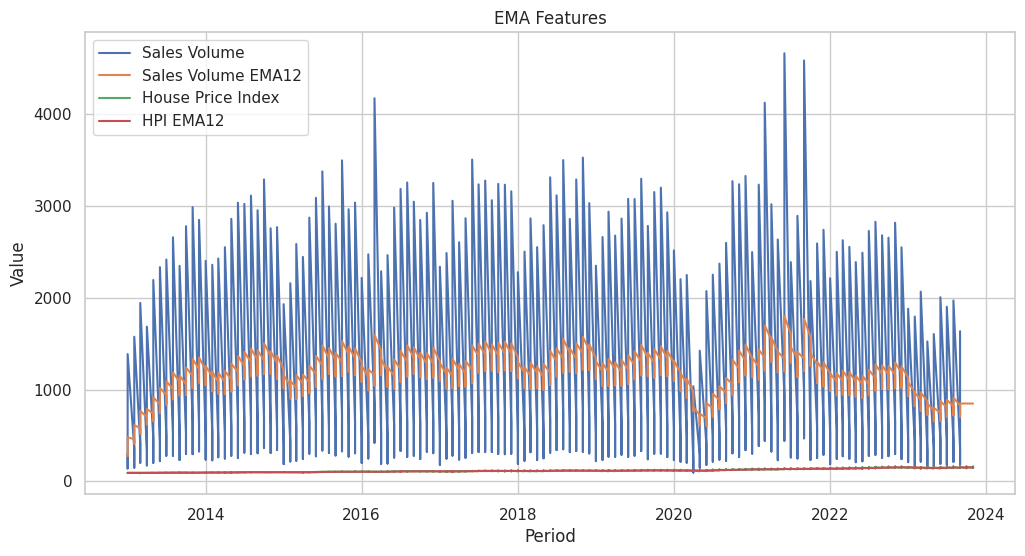

In [ ]:
# Calculate EMA features
df['SalesVolume_EMA12'] = df['Sales volume'].ewm(span=12, adjust=False).mean()
df['HPI_EMA12'] = df['House price index All property types'].ewm(span=12, adjust=False).mean()

print(df[['Period', 'SalesVolume_EMA12', 'HPI_EMA12']].head(525))
plt.figure(figsize=(12, 6))
plt.plot(df['Period'], df['Sales volume'], label='Sales Volume')
plt.plot(df['Period'], df['SalesVolume_EMA12'], label='Sales Volume EMA12')
plt.plot(df['Period'], df['House price index All property types'], label='House Price Index')
plt.plot(df['Period'], df['HPI_EMA12'], label='HPI EMA12')
plt.xlabel('Period')
plt.ylabel('Value')
plt.title('EMA Features')
plt.legend()
plt.show()


# **Relative Strength Index (RSI)**
Features Created:
* SalesVolume_RSI: RSI for sales volume over a 14-period window.
* HPI_RSI: RSI for house price index over a 14-period window.
> Purpose:
RSI is a momentum oscillator that measures the speed and change of price movements. It helps identify overbought or oversold conditions.



      Period  SalesVolume_RSI  HPI_RSI
0 2013-01-01              NaN      NaN
1 2013-01-01              NaN      NaN
2 2013-01-01              NaN      NaN
3 2013-01-01              NaN      NaN
4 2013-02-01              NaN      NaN


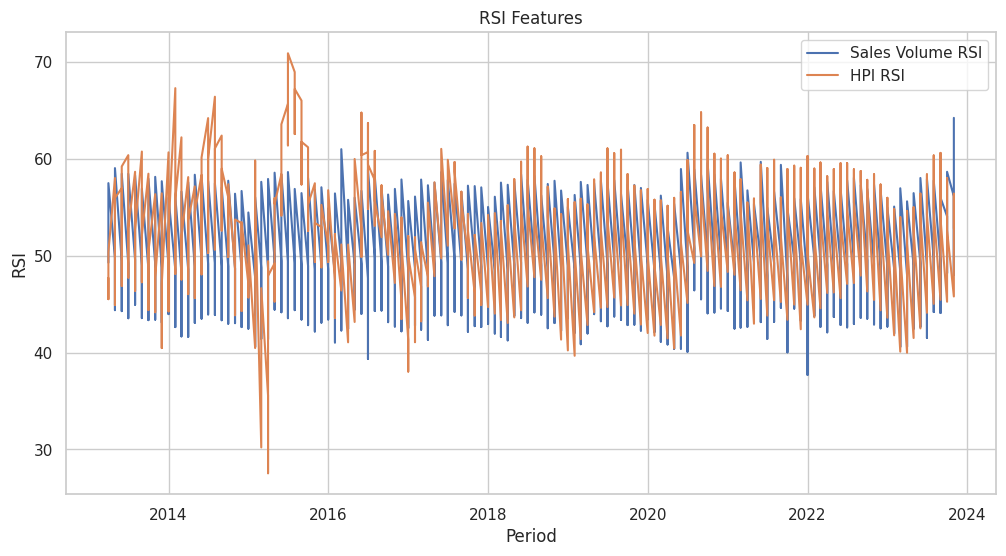

In [ ]:
def calculate_rsi(series, window):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate RSI features
df['SalesVolume_RSI'] = calculate_rsi(df['Sales volume'], 14)
df['HPI_RSI'] = calculate_rsi(df['House price index All property types'], 14)

print(df[['Period', 'SalesVolume_RSI', 'HPI_RSI']].head())
plt.figure(figsize=(12, 6))
plt.plot(df['Period'], df['SalesVolume_RSI'], label='Sales Volume RSI')
plt.plot(df['Period'], df['HPI_RSI'], label='HPI RSI')
plt.xlabel('Period')
plt.ylabel('RSI')
plt.title('RSI Features')
plt.legend()
plt.show()


# **Trend Features**
Features Created:
* SalesVolume_Trend: Binary feature indicating the trend direction of sales volume (1 for uptrend, 0 for downtrend).
* HPI_Trend: Binary feature indicating the trend direction of house price index (1 for uptrend, 0 for downtrend).
> Purpose:
Trend features help capture the direction of movement, providing a simple indication of whether the metric is generally increasing or decreasing.



      Period  SalesVolume_Trend  HPI_Trend
0 2013-01-01                  0          0
1 2013-01-01                  0          0
2 2013-01-01                  1          0
3 2013-01-01                  1          1
4 2013-02-01                  0          1


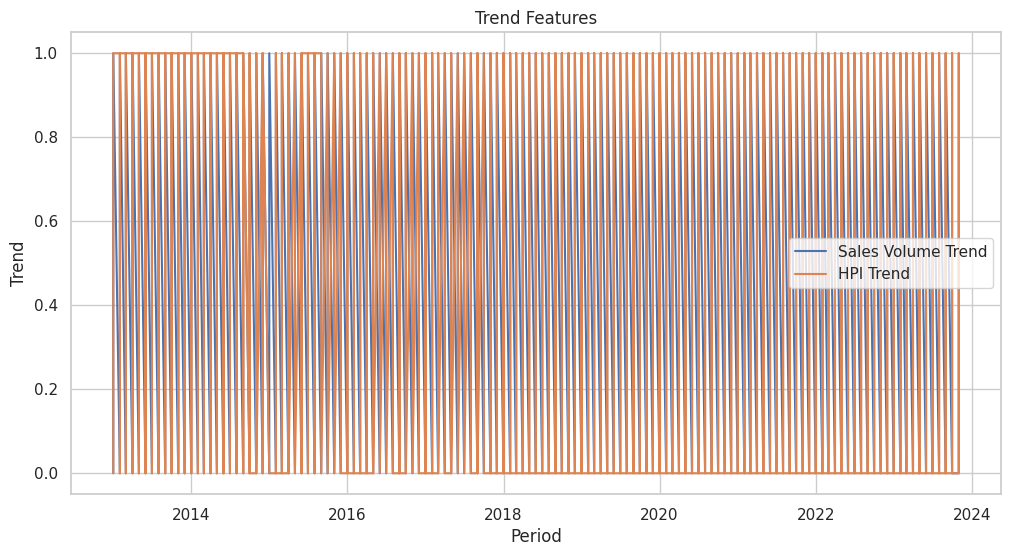

In [ ]:
# Calculate trend features
df['SalesVolume_Trend'] = np.where(df['Sales volume'].diff() > 0, 1, 0)
df['HPI_Trend'] = np.where(df['House price index All property types'].diff() > 0, 1, 0)

print(df[['Period', 'SalesVolume_Trend', 'HPI_Trend']].head())
plt.figure(figsize=(12, 6))
plt.plot(df['Period'], df['SalesVolume_Trend'], label='Sales Volume Trend')
plt.plot(df['Period'], df['HPI_Trend'], label='HPI Trend')
plt.xlabel('Period')
plt.ylabel('Trend')
plt.title('Trend Features')
plt.legend()
plt.show()


# Splitting dataset into training & testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.2, random_state = 42)


#  Gradient Boosting Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier


X = df_clean['House price index All property types'].values.reshape(-1, 1)  # Reshape if X has a single feature
y = df_clean['Sales volume']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# Evaluate the model
print(f"Training Accuracy: {gbc.score(X_train, y_train)}")
print(f"Test Accuracy: {gbc.score(X_test, y_test)}")


Training Accuracy: 0.9514563106796117
Test Accuracy: 0.009615384615384616


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Define the list of regions
regions = ['Leeds', 'Bradford', 'West Yorkshire', 'Calderdale']

# Initialize an empty dictionary to store MAE for each region
mae_results = {}

# Loop through each region
for region in regions:
    # Filter data for the current region
    df_region = df_clean[df_clean['Name'] == region]

    # Check if there's enough data for modeling
    if len(df_region) < 2:
        print(f"Not enough data for {region}. Skipping...")
        continue

    # Prepare X and y for the current region
    X = df_region['House price index All property types'].values.reshape(-1, 1)  # Reshape if X has a single feature
    y = df_region['Sales volume']

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the GradientBoostingRegressor
    gbr = GradientBoostingRegressor()
    gbr.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = gbr.predict(X_test)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    mae_results[region] = mae

    # Print MAE for the current region
    print(f"Region: {region}, Mean Absolute Error (MAE): {mae}")

# Print overall results
print("\nOverall MAE Results:")
for region, mae in mae_results.items():
    print(f"Region: {region}, Mean Absolute Error (MAE): {mae}")


Region: Leeds, Mean Absolute Error (MAE): 163.69105451170236
Region: Bradford, Mean Absolute Error (MAE): 90.05961474246057
Region: West Yorkshire, Mean Absolute Error (MAE): 474.6339188758372
Region: Calderdale, Mean Absolute Error (MAE): 47.47132330275403

Overall MAE Results:
Region: Leeds, Mean Absolute Error (MAE): 163.69105451170236
Region: Bradford, Mean Absolute Error (MAE): 90.05961474246057
Region: West Yorkshire, Mean Absolute Error (MAE): 474.6339188758372
Region: Calderdale, Mean Absolute Error (MAE): 47.47132330275403


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


# Define the list of regions
regions = ['Leeds', 'Bradford', 'West Yorkshire', 'Calderdale']

# Initialize an empty dictionary to store MSE for each region
mse_results = {}

# Loop through each region
for region in regions:
    # Filter data for the current region
    df_region = df_clean[df_clean['Name'] == region]

    # Check if there's enough data for modeling
    if len(df_region) < 2:
        print(f"Not enough data for {region}. Skipping...")
        continue

    # Prepare X and y for the current region
    X = df_region['House price index All property types'].values.reshape(-1, 1)  # Reshape if X has a single feature
    y = df_region['Sales volume']

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the GradientBoostingRegressor
    gbr = GradientBoostingRegressor()
    gbr.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = gbr.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_results[region] = mse

    # Print MSE for the current region
    print(f"Region: {region}, Mean Squared Error (MSE): {mse}")

# Print overall results
print("\nOverall MSE Results:")
for region, mse in mse_results.items():
    print(f"Region: {region}, Mean Squared Error (MSE): {mse}")


Region: Leeds, Mean Squared Error (MSE): 64304.846838813464
Region: Bradford, Mean Squared Error (MSE): 12954.964278837442
Region: West Yorkshire, Mean Squared Error (MSE): 343815.11477428244
Region: Calderdale, Mean Squared Error (MSE): 2936.41426724405

Overall MSE Results:
Region: Leeds, Mean Squared Error (MSE): 64304.846838813464
Region: Bradford, Mean Squared Error (MSE): 12954.964278837442
Region: West Yorkshire, Mean Squared Error (MSE): 343815.11477428244
Region: Calderdale, Mean Squared Error (MSE): 2936.41426724405


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


# Define the list of regions
regions = ['Leeds', 'Bradford', 'West Yorkshire', 'Calderdale']

# Initialize an empty dictionary to store RMSE for each region
rmse_results = {}

# Loop through each region
for region in regions:
    # Filter data for the current region
    df_region = df_clean[df_clean['Name'] == region]

    # Check if there's enough data for modeling
    if len(df_region) < 2:
        print(f"Not enough data for {region}. Skipping...")
        continue

    # Prepare X and y for the current region
    X = df_region['House price index All property types'].values.reshape(-1, 1)  # Reshape if X has a single feature
    y = df_region['Sales volume']

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the GradientBoostingRegressor
    gbr = GradientBoostingRegressor()
    gbr.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = gbr.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    rmse_results[region] = rmse

    # Print RMSE for the current region
    print(f"Region: {region}, Root Mean Squared Error (RMSE): {rmse}")

# Print overall results
print("\nOverall RMSE Results:")
for region, rmse in rmse_results.items():
    print(f"Region: {region}, Root Mean Squared Error (RMSE): {rmse}")


Region: Leeds, Root Mean Squared Error (RMSE): 253.58400351523252
Region: Bradford, Root Mean Squared Error (RMSE): 113.81987646644782
Region: West Yorkshire, Root Mean Squared Error (RMSE): 586.3574974145743
Region: Calderdale, Root Mean Squared Error (RMSE): 54.18869132248951

Overall RMSE Results:
Region: Leeds, Root Mean Squared Error (RMSE): 253.58400351523252
Region: Bradford, Root Mean Squared Error (RMSE): 113.81987646644782
Region: West Yorkshire, Root Mean Squared Error (RMSE): 586.3574974145743
Region: Calderdale, Root Mean Squared Error (RMSE): 54.18869132248951


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Define the list of regions
regions = ['Leeds', 'Bradford', 'West Yorkshire', 'Calderdale']

# Initialize an empty dictionary to store R² for each region
r2_results = {}

# Loop through each region
for region in regions:
    # Filter data for the current region
    df_region = df_clean[df_clean['Name'] == region]

    # Check if there's enough data for modeling
    if len(df_region) < 2:
        print(f"Not enough data for {region}. Skipping...")
        continue

    # Prepare X and y for the current region
    X = df_region['House price index All property types'].values.reshape(-1, 1)  # Reshape if X has a single feature
    y = df_region['Sales volume']

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the GradientBoostingRegressor
    gbr = GradientBoostingRegressor()
    gbr.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = gbr.predict(X_test)

    # Calculate R² score
    r2 = r2_score(y_test, y_pred)
    r2_results[region] = r2

    # Print R² for the current region
    print(f"Region: {region}, R² Score: {r2}")

# Print overall results
print("\nOverall R² Results:")
for region, r2 in r2_results.items():
    print(f"Region: {region}, R² Score: {r2}")


Region: Leeds, R² Score: -1.6437688304665938
Region: Bradford, R² Score: -0.5674406577810893
Region: West Yorkshire, R² Score: -0.9730323955887332
Region: Calderdale, R² Score: -0.021564903665909796

Overall R² Results:
Region: Leeds, R² Score: -1.6437688304665938
Region: Bradford, R² Score: -0.5674406577810893
Region: West Yorkshire, R² Score: -0.9730323955887332
Region: Calderdale, R² Score: -0.021564903665909796


# **Linear Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


# Define the list of regions
regions = ['Leeds', 'Bradford', 'West Yorkshire', 'Calderdale']

# Initialize an empty dictionary to store MAE for each region
mae_results = {}

# Loop through each region
for region in regions:
    # Filter data for the current region
    df_region = df_clean[df_clean['Name'] == region]

    # Check if there's enough data for modeling
    if len(df_region) < 2:
        print(f"Not enough data for {region}. Skipping...")
        continue

    # Prepare X and y for the current region
    X = df_region['House price index All property types'].values.reshape(-1, 1)  # Reshape if X has a single feature
    y = df_region['Sales volume']

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the LinearRegression model
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lr.predict(X_test)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    mae_results[region] = mae

    # Print MAE for the current region
    print(f"Region: {region}, Mean Absolute Error (MAE): {mae}")

# Print overall results
print("\nOverall MAE Results:")
for region, mae in mae_results.items():
    print(f"Region: {region}, Mean Absolute Error (MAE): {mae}")


Region: Leeds, Mean Absolute Error (MAE): 124.27749335356573
Region: Bradford, Mean Absolute Error (MAE): 78.64237102074526
Region: West Yorkshire, Mean Absolute Error (MAE): 345.969303536027
Region: Calderdale, Mean Absolute Error (MAE): 46.88343081760124

Overall MAE Results:
Region: Leeds, Mean Absolute Error (MAE): 124.27749335356573
Region: Bradford, Mean Absolute Error (MAE): 78.64237102074526
Region: West Yorkshire, Mean Absolute Error (MAE): 345.969303536027
Region: Calderdale, Mean Absolute Error (MAE): 46.88343081760124


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Define the list of regions
regions = ['Leeds', 'Bradford', 'West Yorkshire', 'Calderdale']

# Initialize an empty dictionary to store MSE for each region
mse_results = {}

# Loop through each region
for region in regions:
    # Filter data for the current region
    df_region = df_clean[df_clean['Name'] == region]

    # Check if there's enough data for modeling
    if len(df_region) < 2:
        print(f"Not enough data for {region}. Skipping...")
        continue

    # Prepare X and y for the current region
    X = df_region['House price index All property types'].values.reshape(-1, 1)  # Reshape if X has a single feature
    y = df_region['Sales volume']

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the LinearRegression model
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lr.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_results[region] = mse

    # Print MSE for the current region
    print(f"Region: {region}, Mean Squared Error (MSE): {mse}")

# Print overall results
print("\nOverall MSE Results:")
for region, mse in mse_results.items():
    print(f"Region: {region}, Mean Squared Error (MSE): {mse}")


Region: Leeds, Mean Squared Error (MSE): 22202.46991399468
Region: Bradford, Mean Squared Error (MSE): 8917.941872263462
Region: West Yorkshire, Mean Squared Error (MSE): 175890.5583542834
Region: Calderdale, Mean Squared Error (MSE): 2894.6515002250226

Overall MSE Results:
Region: Leeds, Mean Squared Error (MSE): 22202.46991399468
Region: Bradford, Mean Squared Error (MSE): 8917.941872263462
Region: West Yorkshire, Mean Squared Error (MSE): 175890.5583542834
Region: Calderdale, Mean Squared Error (MSE): 2894.6515002250226


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


# Define the list of regions
regions = ['Leeds', 'Bradford', 'West Yorkshire', 'Calderdale']

# Initialize an empty dictionary to store RMSE for each region
rmse_results = {}

# Loop through each region
for region in regions:
    # Filter data for the current region
    df_region = df_clean[df_clean['Name'] == region]

    # Check if there's enough data for modeling
    if len(df_region) < 2:
        print(f"Not enough data for {region}. Skipping...")
        continue

    # Prepare X and y for the current region
    X = df_region['House price index All property types'].values.reshape(-1, 1)  # Reshape if X has a single feature
    y = df_region['Sales volume']

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the LinearRegression model
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lr.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    rmse_results[region] = rmse

    # Print RMSE for the current region
    print(f"Region: {region}, Root Mean Squared Error (RMSE): {rmse}")

# Print overall results
print("\nOverall RMSE Results:")
for region, rmse in rmse_results.items():
    print(f"Region: {region}, Root Mean Squared Error (RMSE): {rmse}")


Region: Leeds, Root Mean Squared Error (RMSE): 149.00493251565425
Region: Bradford, Root Mean Squared Error (RMSE): 94.43485517680143
Region: West Yorkshire, Root Mean Squared Error (RMSE): 419.3930833410148
Region: Calderdale, Root Mean Squared Error (RMSE): 53.80196557956803

Overall RMSE Results:
Region: Leeds, Root Mean Squared Error (RMSE): 149.00493251565425
Region: Bradford, Root Mean Squared Error (RMSE): 94.43485517680143
Region: West Yorkshire, Root Mean Squared Error (RMSE): 419.3930833410148
Region: Calderdale, Root Mean Squared Error (RMSE): 53.80196557956803


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Define the list of regions
regions = ['Leeds', 'Bradford', 'West Yorkshire', 'Calderdale']

# Initialize an empty dictionary to store R^2 score for each region
r2_results = {}

# Loop through each region
for region in regions:
    # Filter data for the current region
    df_region = df_clean[df_clean['Name'] == region]

    # Check if there's enough data for modeling
    if len(df_region) < 2:
        print(f"Not enough data for {region}. Skipping...")
        continue

    # Prepare X and y for the current region
    X = df_region['House price index All property types'].values.reshape(-1, 1)  # Reshape if X has a single feature
    y = df_region['Sales volume']

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the LinearRegression model
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lr.predict(X_test)

    # Calculate R^2 score
    r2 = r2_score(y_test, y_pred)
    r2_results[region] = r2

    # Print R^2 score for the current region
    print(f"Region: {region}, R^2 Score: {r2}")

# Print overall results
print("\nOverall R^2 Score Results:")
for region, r2 in r2_results.items():
    print(f"Region: {region}, R^2 Score: {r2}")


Region: Leeds, R^2 Score: 0.08718858991882283
Region: Bradford, R^2 Score: -0.07899523097477457
Region: West Yorkshire, R^2 Score: -0.009373220659670167
Region: Calderdale, R^2 Score: -0.007035830727350589

Overall R^2 Score Results:
Region: Leeds, R^2 Score: 0.08718858991882283
Region: Bradford, R^2 Score: -0.07899523097477457
Region: West Yorkshire, R^2 Score: -0.009373220659670167
Region: Calderdale, R^2 Score: -0.007035830727350589


# **Support Vector Machine**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Define the list of regions
regions = ['Leeds', 'Bradford', 'West Yorkshire', 'Calderdale']

# Initialize an empty dictionary to store MAE for each region
mae_results = {}

# Loop through each region
for region in regions:
    # Filter data for the current region
    df_region = df_clean[df_clean['Name'] == region]

    # Check if there's enough data for modeling
    if len(df_region) < 2:
        print(f"Not enough data for {region}. Skipping...")
        continue

    # Prepare X and y for the current region
    X = df_region['House price index All property types'].values.reshape(-1, 1)  # Reshape if X has a single feature
    y = df_region['Sales volume']

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the SVR model
    svr = SVR()
    svr.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svr.predict(X_test)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    mae_results[region] = mae

    # Print MAE for the current region
    print(f"Region: {region}, Mean Absolute Error (MAE): {mae}")

# Print overall results
print("\nOverall MAE Results:")
for region, mae in mae_results.items():
    print(f"Region: {region}, Mean Absolute Error (MAE): {mae}")


Region: Leeds, Mean Absolute Error (MAE): 125.57509240331615
Region: Bradford, Mean Absolute Error (MAE): 73.21620412263711
Region: West Yorkshire, Mean Absolute Error (MAE): 349.7069724980049
Region: Calderdale, Mean Absolute Error (MAE): 46.49154098395268

Overall MAE Results:
Region: Leeds, Mean Absolute Error (MAE): 125.57509240331615
Region: Bradford, Mean Absolute Error (MAE): 73.21620412263711
Region: West Yorkshire, Mean Absolute Error (MAE): 349.7069724980049
Region: Calderdale, Mean Absolute Error (MAE): 46.49154098395268


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Define the list of regions
regions = ['Leeds', 'Bradford', 'West Yorkshire', 'Calderdale']

# Initialize an empty dictionary to store MSE for each region
mse_results = {}

# Loop through each region
for region in regions:
    # Filter data for the current region
    df_region = df_clean[df_clean['Name'] == region]

    # Check if there's enough data for modeling
    if len(df_region) < 2:
        print(f"Not enough data for {region}. Skipping...")
        continue

    # Prepare X and y for the current region
    X = df_region['House price index All property types'].values.reshape(-1, 1)  # Reshape if X has a single feature
    y = df_region['Sales volume']

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the SVR model
    svr = SVR()
    svr.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svr.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_results[region] = mse

    # Print MSE for the current region
    print(f"Region: {region}, Mean Squared Error (MSE): {mse}")

# Print overall results
print("\nOverall MSE Results:")
for region, mse in mse_results.items():
    print(f"Region: {region}, Mean Squared Error (MSE): {mse}")


Region: Leeds, Mean Squared Error (MSE): 24033.7486021521
Region: Bradford, Mean Squared Error (MSE): 8024.831600808087
Region: West Yorkshire, Mean Squared Error (MSE): 177635.79447598115
Region: Calderdale, Mean Squared Error (MSE): 2809.4113284202367

Overall MSE Results:
Region: Leeds, Mean Squared Error (MSE): 24033.7486021521
Region: Bradford, Mean Squared Error (MSE): 8024.831600808087
Region: West Yorkshire, Mean Squared Error (MSE): 177635.79447598115
Region: Calderdale, Mean Squared Error (MSE): 2809.4113284202367


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np


# Define the list of regions
regions = ['Leeds', 'Bradford', 'West Yorkshire', 'Calderdale']

# Initialize an empty dictionary to store RMSE for each region
rmse_results = {}

# Loop through each region
for region in regions:
    # Filter data for the current region
    df_region = df_clean[df_clean['Name'] == region]

    # Check if there's enough data for modeling
    if len(df_region) < 2:
        print(f"Not enough data for {region}. Skipping...")
        continue

    # Prepare X and y for the current region
    X = df_region['House price index All property types'].values.reshape(-1, 1)  # Reshape if X has a single feature
    y = df_region['Sales volume']

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the SVR model
    svr = SVR()
    svr.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svr.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    rmse_results[region] = rmse

    # Print RMSE for the current region
    print(f"Region: {region}, Root Mean Squared Error (RMSE): {rmse}")

# Print overall results
print("\nOverall RMSE Results:")
for region, rmse in rmse_results.items():
    print(f"Region: {region}, Root Mean Squared Error (RMSE): {rmse}")


Region: Leeds, Root Mean Squared Error (RMSE): 155.028218728566
Region: Bradford, Root Mean Squared Error (RMSE): 89.58142441828042
Region: West Yorkshire, Root Mean Squared Error (RMSE): 421.46861624085506
Region: Calderdale, Root Mean Squared Error (RMSE): 53.003880314749004

Overall RMSE Results:
Region: Leeds, Root Mean Squared Error (RMSE): 155.028218728566
Region: Bradford, Root Mean Squared Error (RMSE): 89.58142441828042
Region: West Yorkshire, Root Mean Squared Error (RMSE): 421.46861624085506
Region: Calderdale, Root Mean Squared Error (RMSE): 53.003880314749004


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score


# Define the list of regions
regions = ['Leeds', 'Bradford', 'West Yorkshire', 'Calderdale']

# Initialize an empty dictionary to store R² for each region
r2_results = {}

# Loop through each region
for region in regions:
    # Filter data for the current region
    df_region = df_clean[df_clean['Name'] == region]

    # Check if there's enough data for modeling
    if len(df_region) < 2:
        print(f"Not enough data for {region}. Skipping...")
        continue

    # Prepare X and y for the current region
    X = df_region['House price index All property types'].values.reshape(-1, 1)  # Reshape if X has a single feature
    y = df_region['Sales volume']

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the SVR model
    svr = SVR()
    svr.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svr.predict(X_test)

    # Calculate R-squared (R²)
    r2 = r2_score(y_test, y_pred)
    r2_results[region] = r2

    # Print R² for the current region
    print(f"Region: {region}, R-squared (R²): {r2}")

# Print overall results
print("\nOverall R² Results:")
for region, r2 in r2_results.items():
    print(f"Region: {region}, R-squared (R²): {r2}")


Region: Leeds, R-squared (R²): 0.011899124914979686
Region: Bradford, R-squared (R²): 0.02906352713757765
Region: West Yorkshire, R-squared (R²): -0.019388508697026907
Region: Calderdale, R-squared (R²): 0.022618829675845165

Overall R² Results:
Region: Leeds, R-squared (R²): 0.011899124914979686
Region: Bradford, R-squared (R²): 0.02906352713757765
Region: West Yorkshire, R-squared (R²): -0.019388508697026907
Region: Calderdale, R-squared (R²): 0.022618829675845165


# **Random Forest**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


# Define the list of regions
regions = ['Leeds', 'Bradford', 'West Yorkshire', 'Calderdale']

# Initialize an empty dictionary to store MAE for each region
mae_results = {}

# Loop through each region
for region in regions:
    # Filter data for the current region
    df_region = df_clean[df_clean['Name'] == region]

    # Check if there's enough data for modeling
    if len(df_region) < 2:
        print(f"Not enough data for {region}. Skipping...")
        continue

    # Prepare X and y for the current region
    X = df_region['House price index All property types'].values.reshape(-1, 1)  # Reshape if X has a single feature
    y = df_region['Sales volume']

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the RandomForestRegressor model
    rfr = RandomForestRegressor()
    rfr.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rfr.predict(X_test)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    mae_results[region] = mae

    # Print MAE for the current region
    print(f"Region: {region}, Mean Absolute Error (MAE): {mae}")

# Print overall results
print("\nOverall MAE Results:")
for region, mae in mae_results.items():
    print(f"Region: {region}, Mean Absolute Error (MAE): {mae}")


Region: Leeds, Mean Absolute Error (MAE): 154.03843589743593
Region: Bradford, Mean Absolute Error (MAE): 89.48192307692307
Region: West Yorkshire, Mean Absolute Error (MAE): 464.94303846153855
Region: Calderdale, Mean Absolute Error (MAE): 47.82692307692308

Overall MAE Results:
Region: Leeds, Mean Absolute Error (MAE): 154.03843589743593
Region: Bradford, Mean Absolute Error (MAE): 89.48192307692307
Region: West Yorkshire, Mean Absolute Error (MAE): 464.94303846153855
Region: Calderdale, Mean Absolute Error (MAE): 47.82692307692308


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Define the list of regions
regions = ['Leeds', 'Bradford', 'West Yorkshire', 'Calderdale']

# Initialize an empty dictionary to store MSE for each region
mse_results = {}

# Loop through each region
for region in regions:
    # Filter data for the current region
    df_region = df_clean[df_clean['Name'] == region]

    # Check if there's enough data for modeling
    if len(df_region) < 2:
        print(f"Not enough data for {region}. Skipping...")
        continue

    # Prepare X and y for the current region
    X = df_region['House price index All property types'].values.reshape(-1, 1)  # Reshape if X has a single feature
    y = df_region['Sales volume']

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the RandomForestRegressor model
    rfr = RandomForestRegressor()
    rfr.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rfr.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_results[region] = mse

    # Print MSE for the current region
    print(f"Region: {region}, Mean Squared Error (MSE): {mse}")

# Print overall results
print("\nOverall MSE Results:")
for region, mse in mse_results.items():
    print(f"Region: {region}, Mean Squared Error (MSE): {mse}")


Region: Leeds, Mean Squared Error (MSE): 46522.70896415384
Region: Bradford, Mean Squared Error (MSE): 12507.784934615385
Region: West Yorkshire, Mean Squared Error (MSE): 350505.95444691903
Region: Calderdale, Mean Squared Error (MSE): 3174.321288461538

Overall MSE Results:
Region: Leeds, Mean Squared Error (MSE): 46522.70896415384
Region: Bradford, Mean Squared Error (MSE): 12507.784934615385
Region: West Yorkshire, Mean Squared Error (MSE): 350505.95444691903
Region: Calderdale, Mean Squared Error (MSE): 3174.321288461538


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the list of regions
regions = ['Leeds', 'Bradford', 'West Yorkshire', 'Calderdale']

# Initialize an empty dictionary to store RMSE for each region
rmse_results = {}

# Loop through each region
for region in regions:
    # Filter data for the current region
    df_region = df_clean[df_clean['Name'] == region]

    # Check if there's enough data for modeling
    if len(df_region) < 2:
        print(f"Not enough data for {region}. Skipping...")
        continue

    # Prepare X and y for the current region
    X = df_region['House price index All property types'].values.reshape(-1, 1)  # Reshape if X has a single feature
    y = df_region['Sales volume']

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the RandomForestRegressor model
    rfr = RandomForestRegressor()
    rfr.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rfr.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    rmse_results[region] = rmse

    # Print RMSE for the current region
    print(f"Region: {region}, Root Mean Squared Error (RMSE): {rmse}")

# Print overall results
print("\nOverall RMSE Results:")
for region, rmse in rmse_results.items():
    print(f"Region: {region}, Root Mean Squared Error (RMSE): {rmse}")


Region: Leeds, Root Mean Squared Error (RMSE): 215.4917215586925
Region: Bradford, Root Mean Squared Error (RMSE): 112.05687040001676
Region: West Yorkshire, Root Mean Squared Error (RMSE): 561.453390834675
Region: Calderdale, Root Mean Squared Error (RMSE): 58.30248820392858

Overall RMSE Results:
Region: Leeds, Root Mean Squared Error (RMSE): 215.4917215586925
Region: Bradford, Root Mean Squared Error (RMSE): 112.05687040001676
Region: West Yorkshire, Root Mean Squared Error (RMSE): 561.453390834675
Region: Calderdale, Root Mean Squared Error (RMSE): 58.30248820392858


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Define the list of regions
regions = ['Leeds', 'Bradford', 'West Yorkshire', 'Calderdale']

# Initialize an empty dictionary to store R2 for each region
r2_results = {}

# Loop through each region
for region in regions:
    # Filter data for the current region
    df_region = df_clean[df_clean['Name'] == region]

    # Check if there's enough data for modeling
    if len(df_region) < 2:
        print(f"Not enough data for {region}. Skipping...")
        continue

    # Prepare X and y for the current region
    X = df_region['House price index All property types'].values.reshape(-1, 1)  # Reshape if X has a single feature
    y = df_region['Sales volume']

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the RandomForestRegressor model
    rfr = RandomForestRegressor()
    rfr.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rfr.predict(X_test)

    # Calculate R-squared (R2)
    r2 = r2_score(y_test, y_pred)
    r2_results[region] = r2

    # Print R2 for the current region
    print(f"Region: {region}, R-squared (R2): {r2}")

# Print overall results
print("\nOverall R2 Results:")
for region, r2 in r2_results.items():
    print(f"Region: {region}, R-squared (R2): {r2}")


Region: Leeds, R-squared (R2): -1.022329977953846
Region: Bradford, R-squared (R2): -0.5389869818865334
Region: West Yorkshire, R-squared (R2): -0.907201985700324
Region: Calderdale, R-squared (R2): -0.08593587742967079

Overall R2 Results:
Region: Leeds, R-squared (R2): -1.022329977953846
Region: Bradford, R-squared (R2): -0.5389869818865334
Region: West Yorkshire, R-squared (R2): -0.907201985700324
Region: Calderdale, R-squared (R2): -0.08593587742967079


            Region                   Model         MAE            MSE  \
0            Leeds       Linear Regression  124.277493   22202.469914   
1            Leeds  Support Vector Machine  125.575092   24033.748602   
2            Leeds           Random Forest  153.518077   49894.751982   
3            Leeds       Gradient Boosting  163.691055   64304.846839   
4         Bradford       Linear Regression   78.642371    8917.941872   
5         Bradford  Support Vector Machine   73.216204    8024.831601   
6         Bradford           Random Forest   90.732308   12733.561131   
7         Bradford       Gradient Boosting   90.059615   12954.964279   
8   West Yorkshire       Linear Regression  345.969304  175890.558354   
9   West Yorkshire  Support Vector Machine  349.706972  177635.794476   
10  West Yorkshire           Random Forest  465.289792  330897.669973   
11  West Yorkshire       Gradient Boosting  474.633919  343815.114774   
12      Calderdale       Linear Regression   46.883

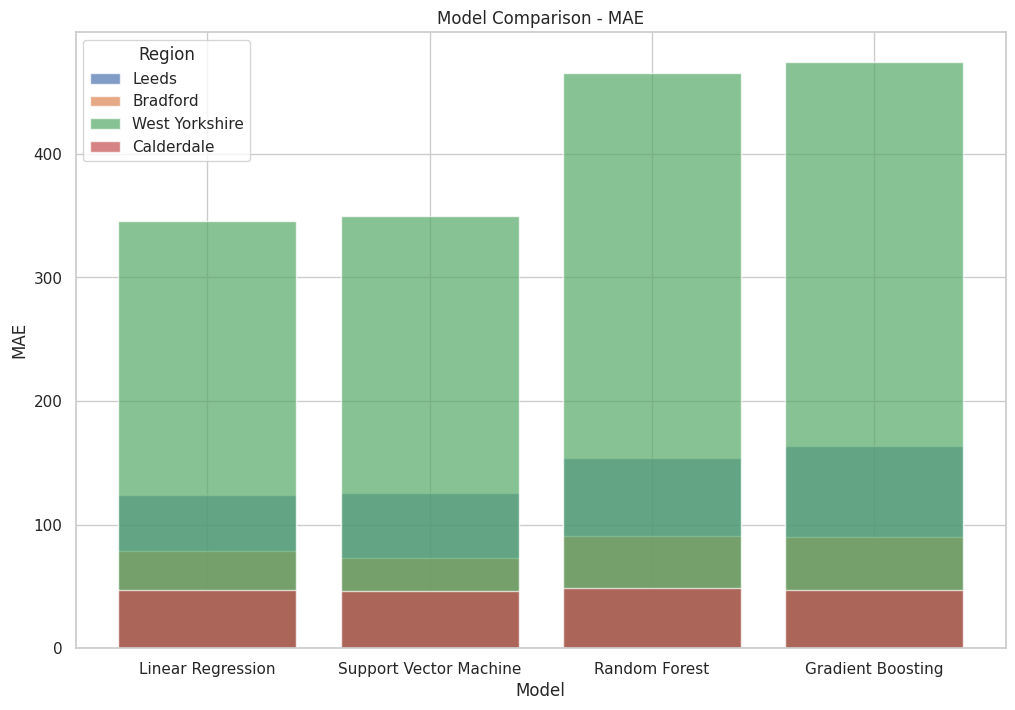

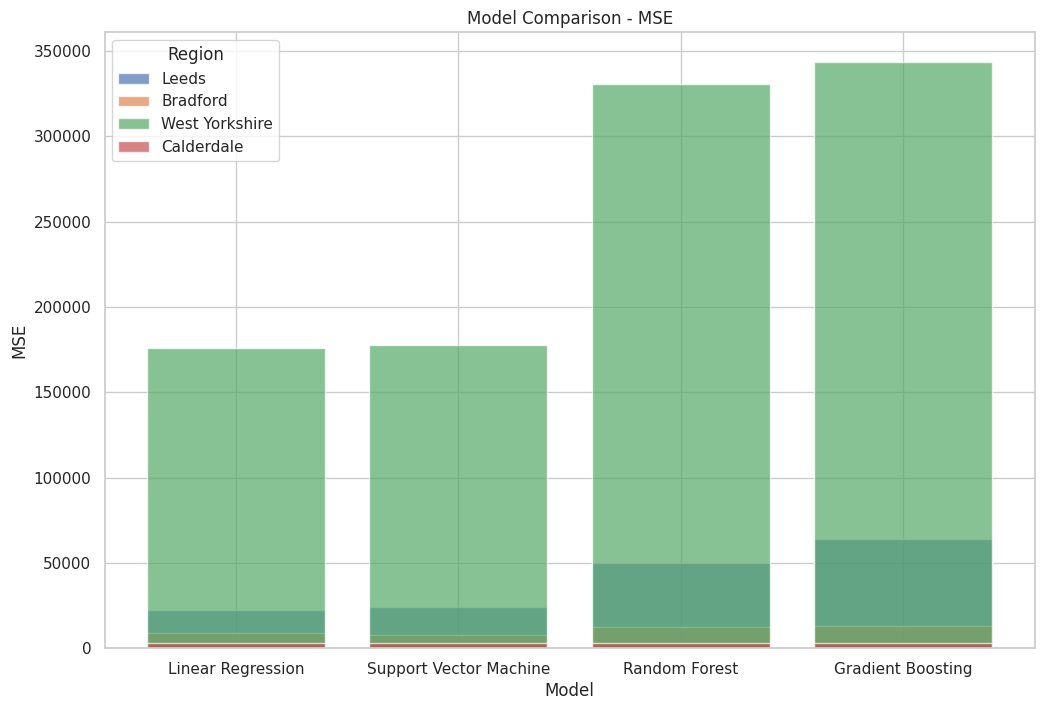

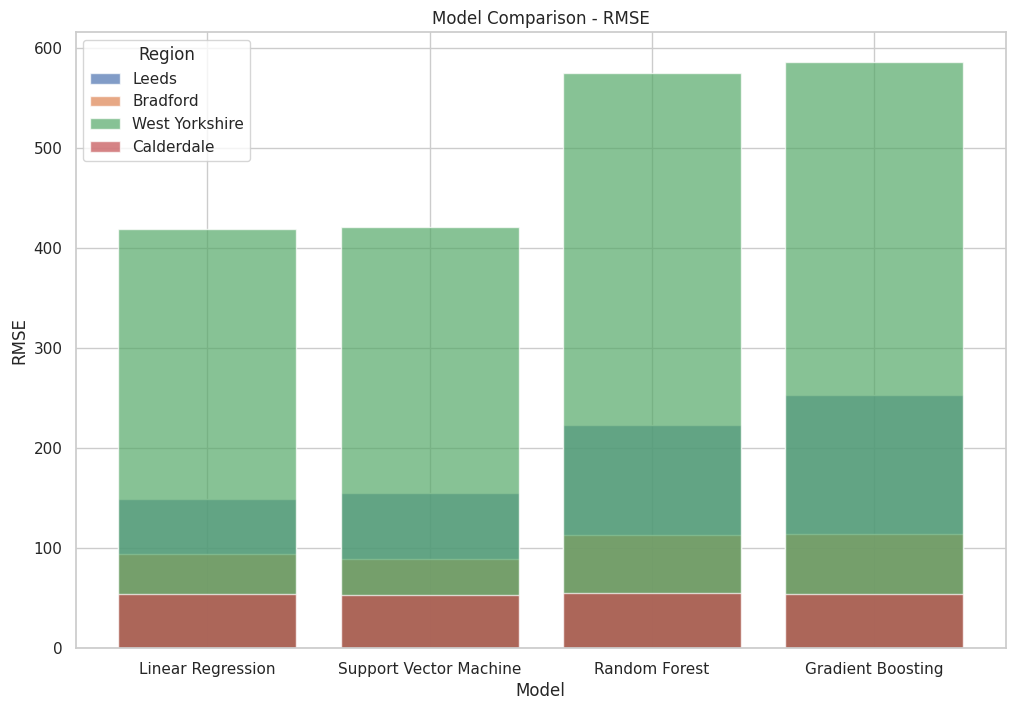

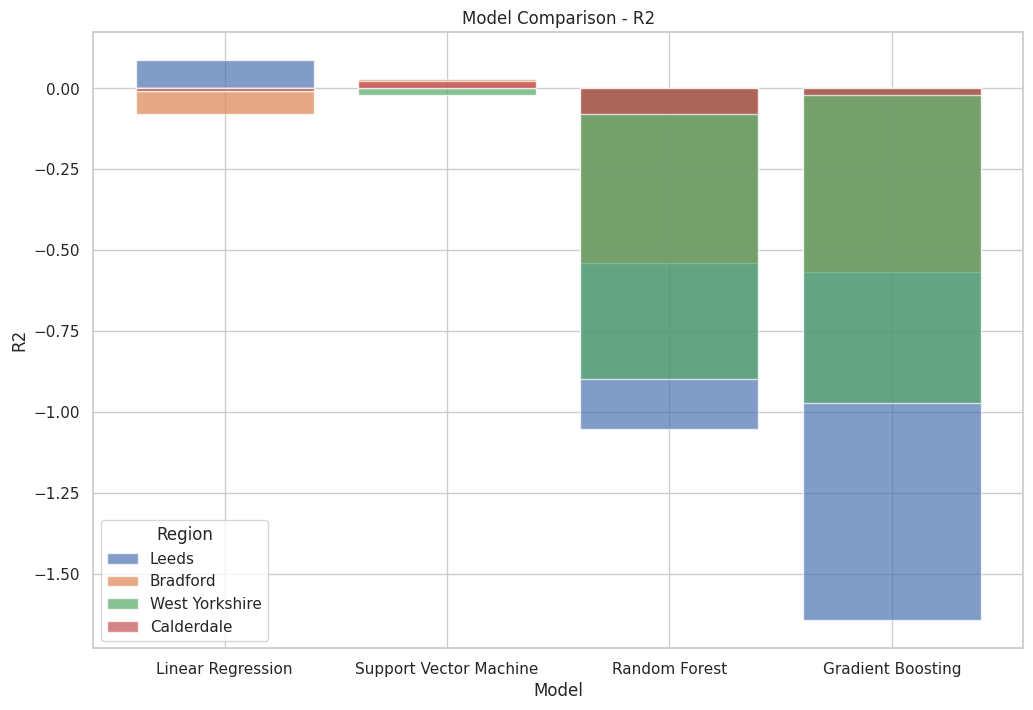

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming df_clean is your DataFrame
regions = ['Leeds', 'Bradford', 'West Yorkshire', 'Calderdale']

# Initialize a list to store results
results_list = []

# Iterate over each region
for region in regions:
    # Filter the data for the current region
    df_region = df_clean[df_clean['Name'] == region]
    X = df_region['House price index All property types'].values.reshape(-1, 1)
    y = df_region['Sales volume']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Support Vector Machine': SVR(),
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor()
    }

    # Train and evaluate each model
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Append the results to the list
        results_list.append({
            'Region': region,
            'Model': model_name,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R2': r2
        })

# Convert the list to a DataFrame
results = pd.DataFrame(results_list)

# Print the results
print(results)

# Plot the results for each metric
metrics = ['MAE', 'MSE', 'RMSE', 'R2']
for metric in metrics:
    plt.figure(figsize=(12, 8))
    for region in regions:
        region_results = results[results['Region'] == region]
        plt.bar(region_results['Model'], region_results[metric], label=region, alpha=0.7)
    plt.title(f'Model Comparison - {metric}')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.legend(title='Region')
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming df_clean is your DataFrame
regions = ['Leeds', 'Bradford', 'West Yorkshire', 'Calderdale']

# Initialize a list to store results
results_list = []

# Iterate over each region
for region in regions:
    # Filter the data for the current region
    df_region = df_clean[df_clean['Name'] == region]
    X = df_region['House price index All property types'].values.reshape(-1, 1)
    y = df_region['Sales volume']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Support Vector Machine': SVR(),
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor()
    }

    # Train and evaluate each model
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Append the results to the list
        results_list.append({
            'Region': region,
            'Model': model_name,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R2': r2
        })

# Convert the list to a DataFrame
results = pd.DataFrame(results_list)

# Function to display the tables
def display_metric_table(metric):
    metric_table = results.pivot(index='Model', columns='Region', values=metric)
    print(f"Comparison of Models based on {metric}:\n")
    print(metric_table)
    print("\n" + "="*50 + "\n")

# Display the tables for each metric
metrics = ['MAE', 'MSE', 'RMSE', 'R2']
for metric in metrics:
    display_metric_table(metric)


Comparison of Models based on MAE:

Region                   Bradford  Calderdale       Leeds  West Yorkshire
Model                                                                    
Gradient Boosting       90.059615   47.471323  163.691055      474.633919
Linear Regression       78.642371   46.883431  124.277493      345.969304
Random Forest           89.051923   49.534231  153.384308      461.823361
Support Vector Machine  73.216204   46.491541  125.575092      349.706972


Comparison of Models based on MSE:

Region                      Bradford   Calderdale         Leeds  \
Model                                                             
Gradient Boosting       12954.964279  2936.414267  64304.846839   
Linear Regression        8917.941872  2894.651500  22202.469914   
Random Forest           12459.626635  3196.084488  49441.089177   
Support Vector Machine   8024.831601  2809.411328  24033.748602   

Region                  West Yorkshire  
Model                                 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dissertation/ukhpi-comparison-all-hpi-bradford-from-2013-01-01-to-2029-01-01.csv')

Region    Bradford  Calderdale       Leeds  West Yorkshire
Year                                                      
2024    135.487616  140.573346  148.317655      143.011447
2025    125.022807  133.472553  131.378556      129.575621
2026    117.430098  126.836616  119.156925      119.743121
2027    113.773091  121.876675  114.630299      115.501662
2028    112.543482  118.688875  114.673033      114.651601


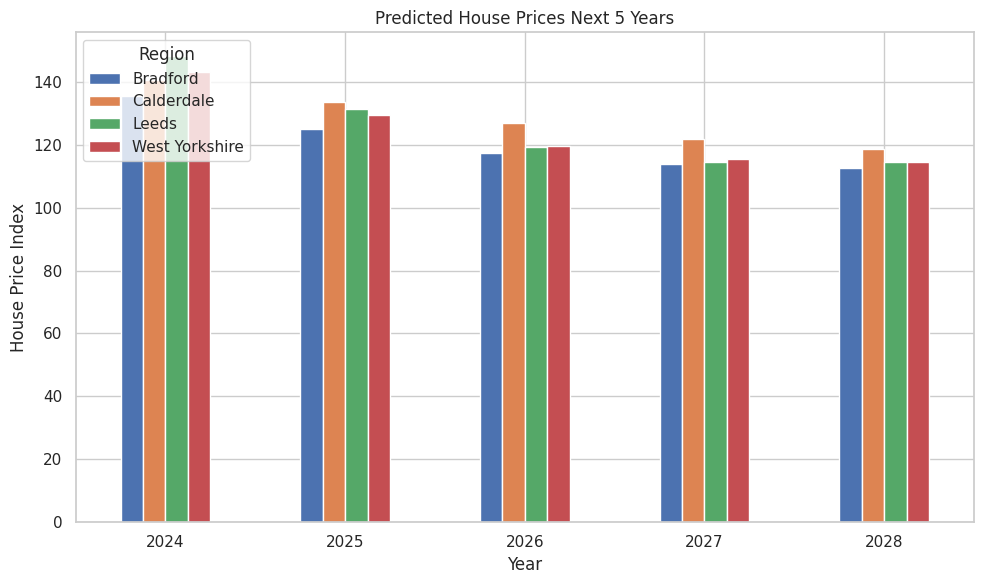

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Ensure the 'Date' column is in datetime format
df_clean['Period'] = pd.to_datetime(df_clean['Period'])

# Define the list of regions
regions = ['Leeds', 'Bradford', 'West Yorkshire', 'Calderdale']

# Create a DataFrame to store predictions
predictions_list = []

# Loop through each region
for region in regions:
    # Filter data for the current region
    df_region = df_clean[df_clean['Name'] == region]

    # Check if there's enough data for modeling
    if len(df_region) < 2:
        print(f"Not enough data for {region}. Skipping...")
        continue

    # Prepare the data
    df_region = df_region.sort_values(by='Period')
    df_region['Year'] = df_region['Period'].dt.year
    yearly_avg = df_region.groupby('Year')['House price index All property types'].mean().reset_index()
    X = yearly_avg['Year'].values.reshape(-1, 1)
    y = yearly_avg['House price index All property types']

    # Training the SVR model
    svr = SVR(kernel='rbf', C=1000, gamma=0.1)  # Adjust parameters as needed
    svr.fit(X, y)

    # Make future predictions for the next 5 years
    future_years = np.arange(yearly_avg['Year'].max() + 1, yearly_avg['Year'].max() + 6).reshape(-1, 1)
    future_predictions = svr.predict(future_years)

    # Store the predictions in the DataFrame
    df_future = pd.DataFrame({'Year': future_years.flatten(), 'Predicted House Price Index': future_predictions, 'Region': region})
    predictions_list.append(df_future)

# Concatenate all predictions into a single DataFrame
predictions = pd.concat(predictions_list)

# Create a table for the next 5 years
prediction_table = predictions.pivot(index='Year', columns='Region', values='Predicted House Price Index')
print(prediction_table)

# Save the table to a CSV file
prediction_table.to_csv('predicted_house_prices_next_5_years_yearly_svr.csv')

# Plotting the bar graph
prediction_table.plot(kind='bar', figsize=(10, 6))
plt.title('Predicted House Prices Next 5 Years')
plt.xlabel('Year')
plt.ylabel('House Price Index')
plt.xticks(rotation=0)
plt.legend(title='Region', loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Find the region with the highest house price index for each year
max_regions = prediction_table.idxmax(axis=1)
max_values = prediction_table.max(axis=1)

# Create a DataFrame to display the results
max_values_df = pd.DataFrame({'Region': max_regions, 'Predicted House Price Index': max_values})
#max_values_df.reset_index(inplace=True)

# Display the table
print("\nRegion with Highest House Price Index Each Year:")
print(max_values_df)


Region with Highest House Price Index Each Year:
          Region  Predicted House Price Index
Year                                         
2024       Leeds                   148.317655
2025  Calderdale                   133.472553
2026  Calderdale                   126.836616
2027  Calderdale                   121.876675
2028  Calderdale                   118.688875


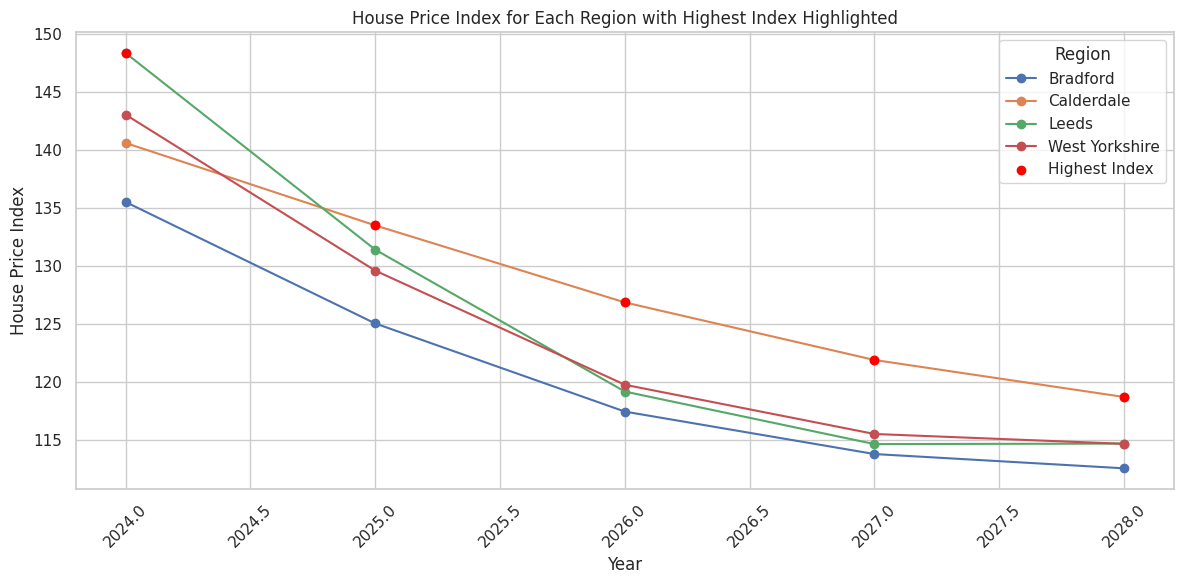

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Find the region with the highest house price index for each year
max_regions = prediction_table.idxmax(axis=1)
max_values = prediction_table.max(axis=1)

# Create a DataFrame to display the results
max_values_df = pd.DataFrame({'Year': prediction_table.index, 'Region': max_regions, 'Predicted House Price Index': max_values})

# Plotting the data
plt.figure(figsize=(12, 6))

# Plot each region's data with different colors
for region in prediction_table.columns:
    plt.plot(prediction_table.index, prediction_table[region], marker='o', label=region)

# Highlight the regions with the highest index values each year
plt.scatter(max_values_df['Year'], max_values_df['Predicted House Price Index'], color='red', zorder=5, label='Highest Index')

# Adding labels and title
plt.title('House Price Index for Each Region with Highest Index Highlighted')
plt.xlabel('Year')
plt.ylabel('House Price Index')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


Epoch 1/50
10/10 - 2s - 238ms/step - loss: 0.3117
Epoch 2/50
10/10 - 0s - 4ms/step - loss: 0.2746
Epoch 3/50
10/10 - 0s - 6ms/step - loss: 0.2267
Epoch 4/50
10/10 - 0s - 6ms/step - loss: 0.1831
Epoch 5/50
10/10 - 0s - 6ms/step - loss: 0.1300
Epoch 6/50
10/10 - 0s - 4ms/step - loss: 0.0895
Epoch 7/50
10/10 - 0s - 4ms/step - loss: 0.0534
Epoch 8/50
10/10 - 0s - 7ms/step - loss: 0.0416
Epoch 9/50
10/10 - 0s - 5ms/step - loss: 0.0356
Epoch 10/50
10/10 - 0s - 6ms/step - loss: 0.0346
Epoch 11/50
10/10 - 0s - 6ms/step - loss: 0.0307
Epoch 12/50
10/10 - 0s - 6ms/step - loss: 0.0291
Epoch 13/50
10/10 - 0s - 5ms/step - loss: 0.0264
Epoch 14/50
10/10 - 0s - 4ms/step - loss: 0.0240
Epoch 15/50
10/10 - 0s - 4ms/step - loss: 0.0221
Epoch 16/50
10/10 - 0s - 7ms/step - loss: 0.0203
Epoch 17/50
10/10 - 0s - 5ms/step - loss: 0.0184
Epoch 18/50
10/10 - 0s - 5ms/step - loss: 0.0166
Epoch 19/50
10/10 - 0s - 5ms/step - loss: 0.0147
Epoch 20/50
10/10 - 0s - 5ms/step - loss: 0.0134
Epoch 21/50
10/10 - 0s - 4m

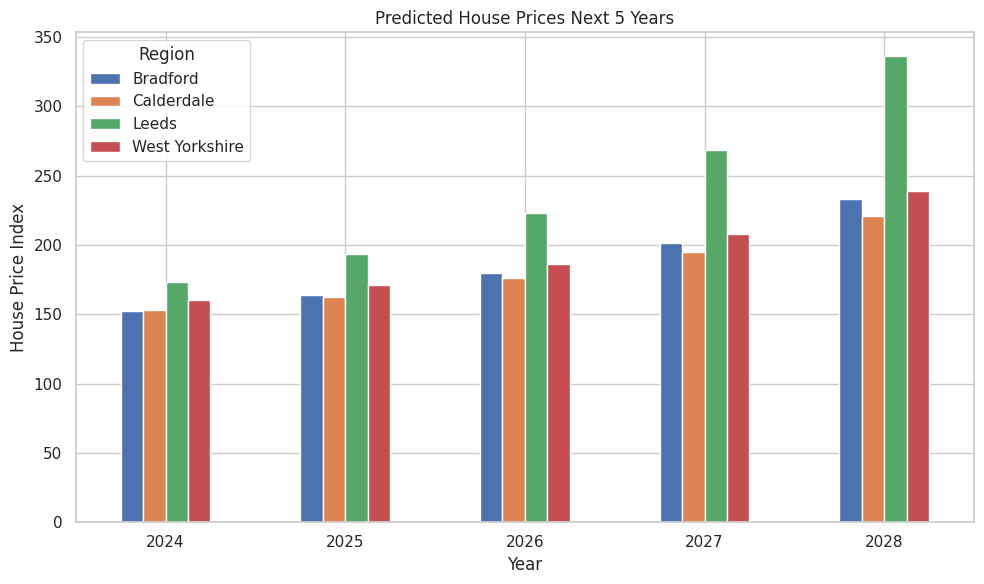

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Ensure the 'Period' column is in datetime format
df_clean['Period'] = pd.to_datetime(df_clean['Period'])

# Define the list of regions
regions = ['Leeds', 'Bradford', 'West Yorkshire', 'Calderdale']

# Create a DataFrame to store predictions
predictions_list = []

# Loop through each region
for region in regions:
    # Filter data for the current region
    df_region = df_clean[df_clean['Name'] == region]

    # Check if there's enough data for modeling
    if len(df_region) < 2:
        print(f"Not enough data for {region}. Skipping...")
        continue

    # Prepare the data
    df_region = df_region.sort_values(by='Period')
    df_region['Year'] = df_region['Period'].dt.year
    yearly_avg = df_region.groupby('Year')['House price index All property types'].mean().reset_index()
    X = yearly_avg['Year'].values.reshape(-1, 1)
    y = yearly_avg['House price index All property types'].values.reshape(-1, 1)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    y_scaled = scaler.fit_transform(y)

    # Prepare the data for LSTM
    X_lstm, y_lstm = [], []
    for i in range(1, len(X)):
        X_lstm.append(y_scaled[i-1:i, 0])
        y_lstm.append(y_scaled[i, 0])
    X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)
    X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], X_lstm.shape[1], 1))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_lstm, y_lstm, epochs=50, batch_size=1, verbose=2)

    # Make future predictions for the next 5 years
    future_predictions = []
    last_input = y_scaled[-1:]
    for _ in range(5):
        next_pred = model.predict(last_input.reshape(1, 1, 1))
        future_predictions.append(next_pred[0, 0])
        last_input = next_pred

    # Inverse transform the predictions to original scale
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

    # Store the predictions in the DataFrame
    future_years = np.arange(yearly_avg['Year'].max() + 1, yearly_avg['Year'].max() + 6)
    df_future = pd.DataFrame({'Year': future_years, 'Predicted House Price Index': future_predictions, 'Region': region})
    predictions_list.append(df_future)

# Concatenate all predictions into a single DataFrame
predictions = pd.concat(predictions_list)

# Create a table for the next 5 years
prediction_table = predictions.pivot(index='Year', columns='Region', values='Predicted House Price Index')
print(prediction_table)

# Save the table to a CSV file
prediction_table.to_csv('predicted_house_prices_next_5_years_yearly_lstm.csv')

# Plotting the bar graph
prediction_table.plot(kind='bar', figsize=(10, 6))
plt.title('Predicted House Prices Next 5 Years')
plt.xlabel('Year')
plt.ylabel('House Price Index')
plt.xticks(rotation=0)
plt.legend(title='Region', loc='upper left')
plt.tight_layout()
plt.show()


Epoch 1/50
7/7 - 3s - 411ms/step - loss: 0.1035
Epoch 2/50
7/7 - 0s - 8ms/step - loss: 0.0561
Epoch 3/50
7/7 - 0s - 8ms/step - loss: 0.0249
Epoch 4/50
7/7 - 0s - 8ms/step - loss: 0.0127
Epoch 5/50
7/7 - 0s - 9ms/step - loss: 0.0133
Epoch 6/50
7/7 - 0s - 20ms/step - loss: 0.0121
Epoch 7/50
7/7 - 0s - 8ms/step - loss: 0.0097
Epoch 8/50
7/7 - 0s - 8ms/step - loss: 0.0082
Epoch 9/50
7/7 - 0s - 9ms/step - loss: 0.0074
Epoch 10/50
7/7 - 0s - 8ms/step - loss: 0.0067
Epoch 11/50
7/7 - 0s - 9ms/step - loss: 0.0056
Epoch 12/50
7/7 - 0s - 9ms/step - loss: 0.0050
Epoch 13/50
7/7 - 0s - 8ms/step - loss: 0.0043
Epoch 14/50
7/7 - 0s - 10ms/step - loss: 0.0041
Epoch 15/50
7/7 - 0s - 8ms/step - loss: 0.0030
Epoch 16/50
7/7 - 0s - 8ms/step - loss: 0.0025
Epoch 17/50
7/7 - 0s - 9ms/step - loss: 0.0019
Epoch 18/50
7/7 - 0s - 19ms/step - loss: 0.0014
Epoch 19/50
7/7 - 0s - 16ms/step - loss: 0.0012
Epoch 20/50
7/7 - 0s - 20ms/step - loss: 8.7825e-04
Epoch 21/50
7/7 - 0s - 21ms/step - loss: 6.4648e-04
Epoch 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Epoch 1/50
7/7 - 3s - 459ms/step - loss: 0.1040
Epoch 2/50
7/7 - 0s - 5ms/step - loss: 0.0664
Epoch 3/50
7/7 - 0s - 5ms/step - loss: 0.0376
Epoch 4/50
7/7 - 0s - 5ms/step - loss: 0.0173
Epoch 5/50
7/7 - 0s - 8ms/step - loss: 0.0119
Epoch 6/50
7/7 - 0s - 9ms/step - loss: 0.0111
Epoch 7/50
7/7 - 0s - 8ms/step - loss: 0.0110
Epoch 8/50
7/7 - 0s - 5ms/step - loss: 0.0090
Epoch 9/50
7/7 - 0s - 8ms/step - loss: 0.0088
Epoch 10/50
7/7 - 0s - 8ms/step - loss: 0.0083
Epoch 11/50
7/7 - 0s - 4ms/step - loss: 0.0069
Epoch 12/50
7/7 - 0s - 8ms/step - loss: 0.0061
Epoch 13/50
7/7 - 0s - 4ms/step - loss: 0.0054
Epoch 14/50
7/7 - 0s - 5ms/step - loss: 0.0046
Epoch 15/50
7/7 - 0s - 8ms/step - loss: 0.0038
Epoch 16/50
7/7 - 0s - 9ms/step - loss: 0.0034
Epoch 17/50
7/7 - 0s - 6ms/step - loss: 0.0026
Epoch 18/50
7/7 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Epoch 1/50
7/7 - 3s - 397ms/step - loss: 0.0954
Epoch 2/50
7/7 - 0s - 5ms/step - loss: 0.0499
Epoch 3/50
7/7 - 0s - 8ms/step - loss: 0.0231
Epoch 4/50
7/7 - 0s - 5ms/step - loss: 0.0187
Epoch 5/50
7/7 - 0s - 8ms/step - loss: 0.0110
Epoch 6/50
7/7 - 0s - 4ms/step - loss: 0.0118
Epoch 7/50
7/7 - 0s - 4ms/step - loss: 0.0103
Epoch 8/50
7/7 - 0s - 4ms/step - loss: 0.0082
Epoch 9/50
7/7 - 0s - 9ms/step - loss: 0.0075
Epoch 10/50
7/7 - 0s - 4ms/step - loss: 0.0070
Epoch 11/50
7/7 - 0s - 9ms/step - loss: 0.0059
Epoch 12/50
7/7 - 0s - 9ms/step - loss: 0.0055
Epoch 13/50
7/7 - 0s - 5ms/step - loss: 0.0045
Epoch 14/50
7/7 - 0s - 8ms/step - loss: 0.0039
Epoch 15/50
7/7 - 0s - 8ms/step - loss: 0.0031
Epoch 16/50
7/7 - 0s - 8ms/step - loss: 0.0026
Epoch 17/50
7/7 - 0s - 5ms/step - loss: 0.0022
Epoch 18/50
7/7 -

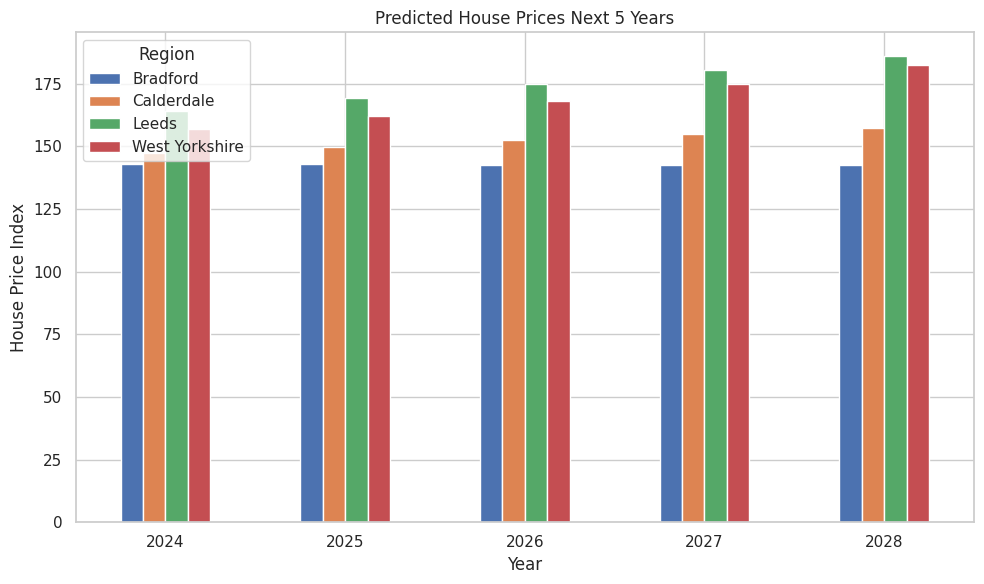

           Region   GRU MAE
0           Leeds  5.510823
1        Bradford  5.621439
2  West Yorkshire  5.287397
3      Calderdale  3.168363


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
import matplotlib.pyplot as plt

# Ensure the 'Period' column is in datetime format
df_clean['Period'] = pd.to_datetime(df_clean['Period'])

# Define the list of regions
regions = ['Leeds', 'Bradford', 'West Yorkshire', 'Calderdale']

# Create DataFrames to store predictions and metrics
predictions_list = []
mae_results = []

# Loop through each region
for region in regions:
    # Filter data for the current region
    df_region = df_clean[df_clean['Name'] == region]

    # Check if there's enough data for modeling
    if len(df_region) < 2:
        print(f"Not enough data for {region}. Skipping...")
        continue

    # Prepare the data
    df_region = df_region.sort_values(by='Period')
    df_region['Year'] = df_region['Period'].dt.year
    yearly_avg = df_region.groupby('Year')['House price index All property types'].mean().reset_index()
    X = yearly_avg['Year'].values.reshape(-1, 1)
    y = yearly_avg['House price index All property types'].values.reshape(-1, 1)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    y_scaled = scaler.fit_transform(y)

    # Split the data into training and testing
    split_index = int(len(X) * 0.8)  # 80% training, 20% testing
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y_scaled[:split_index], y_scaled[split_index:]

    X_train_gru, y_train_gru = [], []
    X_test_gru, y_test_gru = [], []

    for i in range(1, len(X_train)):
        X_train_gru.append(y_train[i-1:i, 0])
        y_train_gru.append(y_train[i, 0])
    X_train_gru, y_train_gru = np.array(X_train_gru), np.array(y_train_gru)
    X_train_gru = np.reshape(X_train_gru, (X_train_gru.shape[0], X_train_gru.shape[1], 1))

    for i in range(1, len(X_test)):
        X_test_gru.append(y_scaled[split_index + i - 1:split_index + i, 0])
        y_test_gru.append(y_scaled[split_index + i, 0])
    X_test_gru, y_test_gru = np.array(X_test_gru), np.array(y_test_gru)
    X_test_gru = np.reshape(X_test_gru, (X_test_gru.shape[0], X_test_gru.shape[1], 1))

    # Build the GRU model
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_train_gru.shape[1], 1)))
    model.add(GRU(units=50))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train_gru, y_train_gru, epochs=50, batch_size=1, verbose=2)

    # Make predictions on the test set
    y_pred_scaled = model.predict(X_test_gru)
    y_pred = scaler.inverse_transform(y_pred_scaled)

    # Inverse transform the test targets to original scale
    y_test_original = scaler.inverse_transform(y_test_gru.reshape(-1, 1))

    # Calculate MAE
    mae = mean_absolute_error(y_test_original, y_pred)
    mae_results.append({'Region': region, 'GRU MAE': mae})

    # Future predictions (for the sake of completeness)
    future_predictions = []
    last_input = y_scaled[-1:]
    for _ in range(5):
        next_pred = model.predict(last_input.reshape(1, 1, 1))
        future_predictions.append(next_pred[0, 0])
        last_input = next_pred

    # Inverse transform the predictions to original scale
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

    # Store the predictions in the DataFrame
    future_years = np.arange(yearly_avg['Year'].max() + 1, yearly_avg['Year'].max() + 6)
    df_future = pd.DataFrame({'Year': future_years, 'Predicted House Price Index': future_predictions, 'Region': region})
    predictions_list.append(df_future)

# Concatenate all predictions into a single DataFrame
predictions = pd.concat(predictions_list)

# Create a table for the next 5 years
prediction_table = predictions.pivot(index='Year', columns='Region', values='Predicted House Price Index')
print(prediction_table)

# Save the table to a CSV file
prediction_table.to_csv('predicted_house_prices_next_5_years_yearly_gru.csv')

# Plotting the bar graph for predictions
prediction_table.plot(kind='bar', figsize=(10, 6))
plt.title('Predicted House Prices Next 5 Years')
plt.xlabel('Year')
plt.ylabel('House Price Index')
plt.xticks(rotation=0)
plt.legend(title='Region', loc='upper left')
plt.tight_layout()
plt.show()

# Create DataFrame for MAE results
mae_df = pd.DataFrame(mae_results)
mae_df.to_csv('gru_mae_results.csv', index=False)
print(mae_df)



Epoch 1/50
7/7 - 3s - 449ms/step - loss: 0.1253
Epoch 2/50
7/7 - 0s - 9ms/step - loss: 0.1092
Epoch 3/50
7/7 - 0s - 19ms/step - loss: 0.0933
Epoch 4/50
7/7 - 0s - 7ms/step - loss: 0.0749
Epoch 5/50
7/7 - 0s - 9ms/step - loss: 0.0576
Epoch 6/50
7/7 - 0s - 5ms/step - loss: 0.0452
Epoch 7/50
7/7 - 0s - 4ms/step - loss: 0.0309
Epoch 8/50
7/7 - 0s - 4ms/step - loss: 0.0194
Epoch 9/50
7/7 - 0s - 4ms/step - loss: 0.0151
Epoch 10/50
7/7 - 0s - 9ms/step - loss: 0.0128
Epoch 11/50
7/7 - 0s - 5ms/step - loss: 0.0126
Epoch 12/50
7/7 - 0s - 5ms/step - loss: 0.0122
Epoch 13/50
7/7 - 0s - 4ms/step - loss: 0.0119
Epoch 14/50
7/7 - 0s - 5ms/step - loss: 0.0114
Epoch 15/50
7/7 - 0s - 6ms/step - loss: 0.0107
Epoch 16/50
7/7 - 0s - 6ms/step - loss: 0.0103
Epoch 17/50
7/7 - 0s - 6ms/step - loss: 0.0094
Epoch 18/50
7/7 - 0s - 6ms/step - loss: 0.0093
Epoch 19/50
7/7 - 0s - 8ms/step - loss: 0.0087
Epoch 20/50
7/7 - 0s - 8ms/step - loss: 0.0080
Epoch 21/50
7/7 - 0s - 8ms/step - loss: 0.0079
Epoch 22/50
7/7 - 0

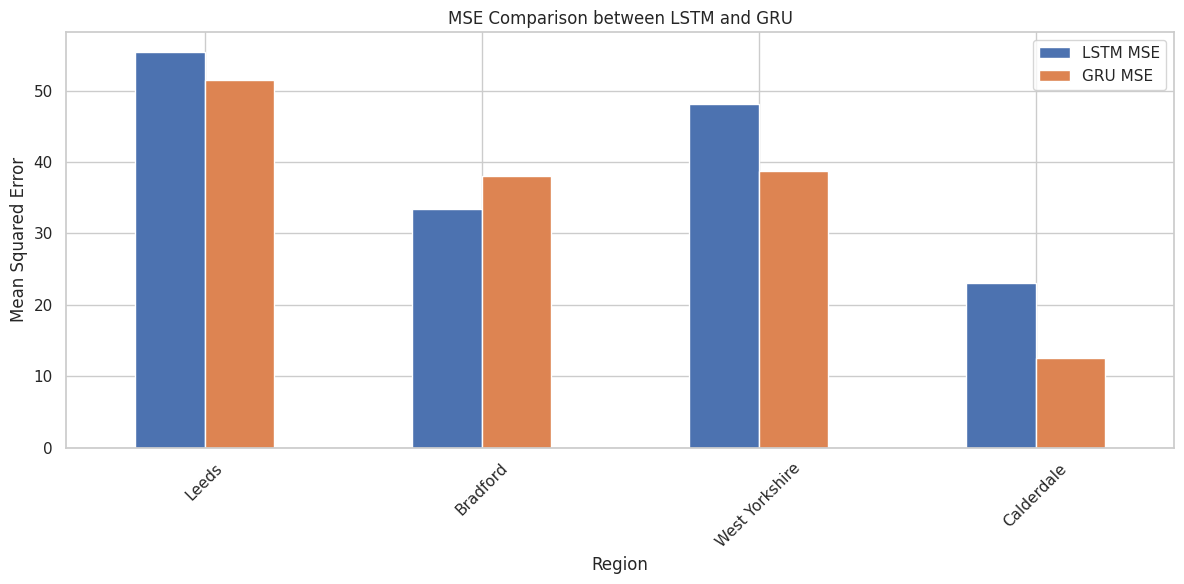

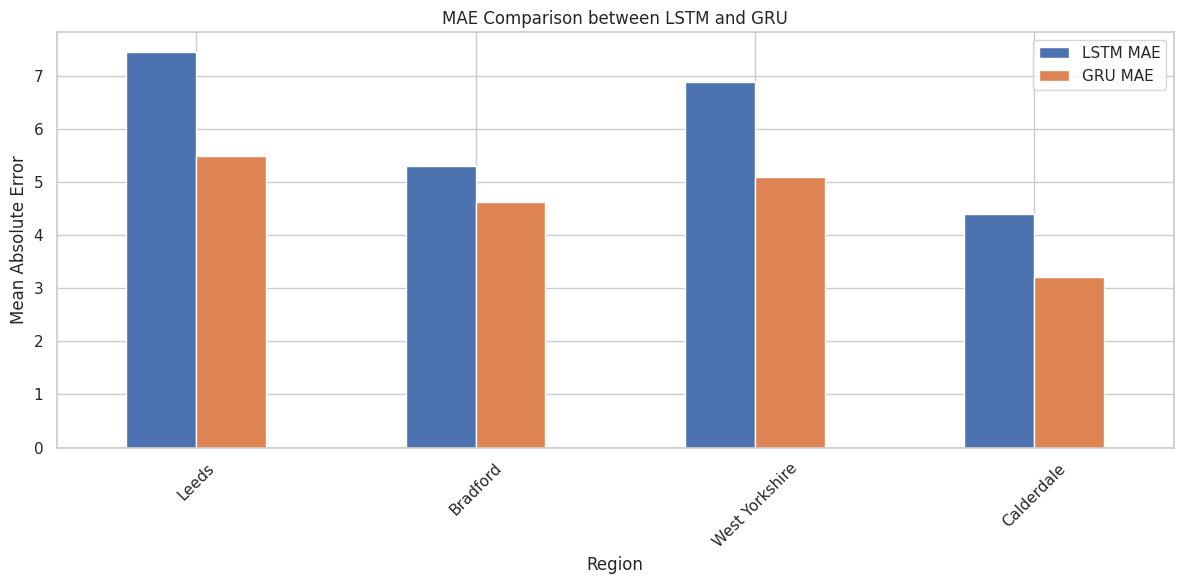

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
import matplotlib.pyplot as plt

# Ensure the 'Period' column is in datetime format
df_clean['Period'] = pd.to_datetime(df_clean['Period'])

# Define the list of regions
regions = ['Leeds', 'Bradford', 'West Yorkshire', 'Calderdale']

# Create DataFrames to store predictions and metrics
lstm_mae_results = []
gru_mae_results = []

# Function to prepare data for LSTM/GRU
def prepare_data(X, y, test_size=0.2):
    scaler = MinMaxScaler(feature_range=(0, 1))
    y_scaled = scaler.fit_transform(y)

    split_index = int(len(X) * (1 - test_size))  # Split point
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y_scaled[:split_index], y_scaled[split_index:]

    X_train_seq, y_train_seq = [], []
    X_test_seq, y_test_seq = [], []

    for i in range(1, len(X_train)):
        X_train_seq.append(y_train[i-1:i, 0])
        y_train_seq.append(y_train[i, 0])
    X_train_seq, y_train_seq = np.array(X_train_seq), np.array(y_train_seq)
    X_train_seq = np.reshape(X_train_seq, (X_train_seq.shape[0], X_train_seq.shape[1], 1))

    for i in range(1, len(X_test)):
        X_test_seq.append(y_scaled[split_index + i - 1:split_index + i, 0])
        y_test_seq.append(y_scaled[split_index + i, 0])
    X_test_seq, y_test_seq = np.array(X_test_seq), np.array(y_test_seq)
    X_test_seq = np.reshape(X_test_seq, (X_test_seq.shape[0], X_test_seq.shape[1], 1))

    return X_train_seq, X_test_seq, y_train_seq, y_test_seq, scaler

# Function to train and evaluate a model
def train_evaluate_model(X_train, X_test, y_train, y_test, model_type='LSTM'):
    model = Sequential()
    if model_type == 'LSTM':
        model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
        model.add(LSTM(units=50))
    elif model_type == 'GRU':
        model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
        model.add(GRU(units=50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)
    y_pred_scaled = model.predict(X_test)
    return y_pred_scaled

# Loop through each region and compare models
for region in regions:
    # Filter data for the current region
    df_region = df_clean[df_clean['Name'] == region]
    if len(df_region) < 2:
        print(f"Not enough data for {region}. Skipping...")
        continue

    # Prepare the data
    df_region = df_region.sort_values(by='Period')
    df_region['Year'] = df_region['Period'].dt.year
    yearly_avg = df_region.groupby('Year')['House price index All property types'].mean().reset_index()
    X = yearly_avg['Year'].values.reshape(-1, 1)
    y = yearly_avg['House price index All property types'].values.reshape(-1, 1)

    # Prepare data for LSTM and GRU
    X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm, scaler_lstm = prepare_data(X, y)
    X_train_gru, X_test_gru, y_train_gru, y_test_gru, scaler_gru = prepare_data(X, y)

    # Train and evaluate LSTM
    y_pred_lstm_scaled = train_evaluate_model(X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm, model_type='LSTM')
    y_pred_lstm = scaler_lstm.inverse_transform(y_pred_lstm_scaled)
    y_test_lstm_original = scaler_lstm.inverse_transform(y_test_lstm.reshape(-1, 1))

    # Calculate MAE and MSE for LSTM
    mae_lstm = mean_absolute_error(y_test_lstm_original, y_pred_lstm)
    mse_lstm = mean_squared_error(y_test_lstm_original, y_pred_lstm)
    lstm_mae_results.append({'Region': region, 'LSTM MAE': mae_lstm, 'LSTM MSE': mse_lstm})

    # Train and evaluate GRU
    y_pred_gru_scaled = train_evaluate_model(X_train_gru, X_test_gru, y_train_gru, y_test_gru, model_type='GRU')
    y_pred_gru = scaler_gru.inverse_transform(y_pred_gru_scaled)
    y_test_gru_original = scaler_gru.inverse_transform(y_test_gru.reshape(-1, 1))

    # Calculate MAE and MSE for GRU
    mae_gru = mean_absolute_error(y_test_gru_original, y_pred_gru)
    mse_gru = mean_squared_error(y_test_gru_original, y_pred_gru)
    gru_mae_results.append({'Region': region, 'GRU MAE': mae_gru, 'GRU MSE': mse_gru})

# Combine results for comparison
lstm_df = pd.DataFrame(lstm_mae_results)
gru_df = pd.DataFrame(gru_mae_results)

comparison_df = pd.merge(lstm_df, gru_df, on='Region')

# Print comparison results
print(comparison_df)

# Save results to CSV
comparison_df.to_csv('lstm_vs_gru_comparison.csv', index=False)

# Plot MSE comparison
comparison_df.plot(x='Region', y=['LSTM MSE', 'GRU MSE'], kind='bar', figsize=(12, 6))
plt.title('MSE Comparison between LSTM and GRU')
plt.xlabel('Region')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot MAE comparison
comparison_df.plot(x='Region', y=['LSTM MAE', 'GRU MAE'], kind='bar', figsize=(12, 6))
plt.title('MAE Comparison between LSTM and GRU')
plt.xlabel('Region')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
